In [1]:
## this notebooks is practice exercise for advanced HHousing Price Prediction Kaggle Competition
# https://www.kaggle.com/competitions/home-data-for-ml-course/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = pd.read_csv('Datasets/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. EDA part

In [4]:
## data describe for data overview
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.shape

(1460, 81)

In [6]:
## get columns
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
## number of columsn having atleast one missing value
train_data.isna().any().sum()

19

In [8]:
## feature with NA values - 
features_with_na = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature, " : ", np.round(train_data[feature].isnull().mean(), 4), "% missing values.")

LotFrontage  :  0.1774 % missing values.
Alley  :  0.9377 % missing values.
MasVnrType  :  0.5973 % missing values.
MasVnrArea  :  0.0055 % missing values.
BsmtQual  :  0.0253 % missing values.
BsmtCond  :  0.0253 % missing values.
BsmtExposure  :  0.026 % missing values.
BsmtFinType1  :  0.0253 % missing values.
BsmtFinType2  :  0.026 % missing values.
FireplaceQu  :  0.4726 % missing values.
GarageType  :  0.0555 % missing values.
GarageYrBlt  :  0.0555 % missing values.
GarageFinish  :  0.0555 % missing values.
GarageQual  :  0.0555 % missing values.
GarageCond  :  0.0555 % missing values.
PoolQC  :  0.9952 % missing values.
Fence  :  0.8075 % missing values.
MiscFeature  :  0.963 % missing values.


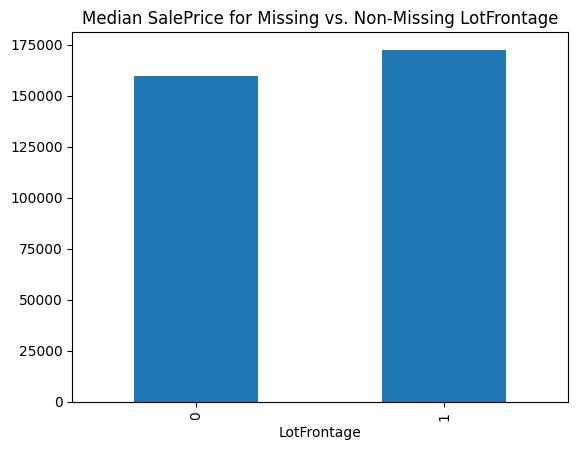

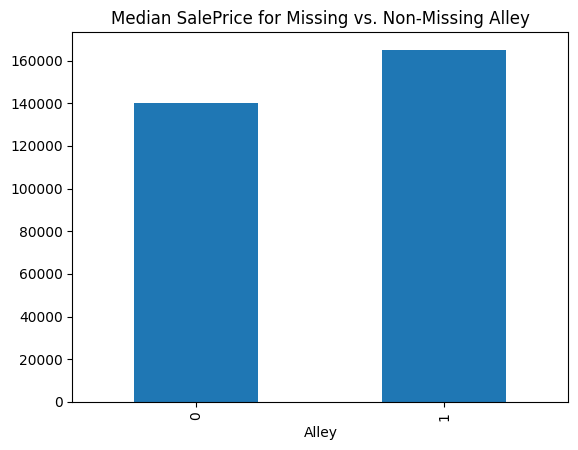

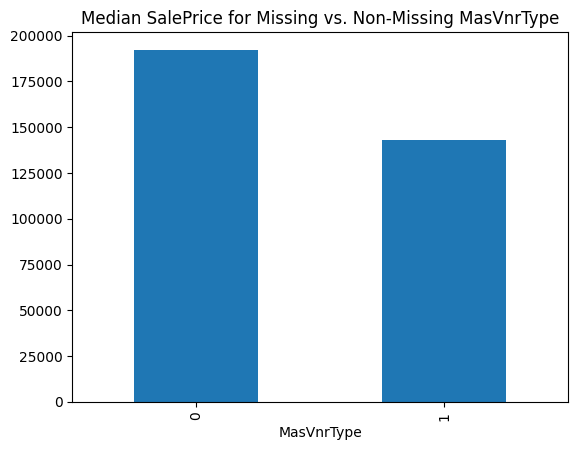

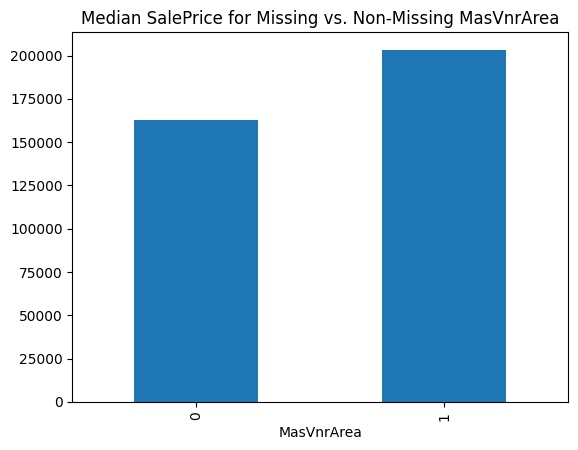

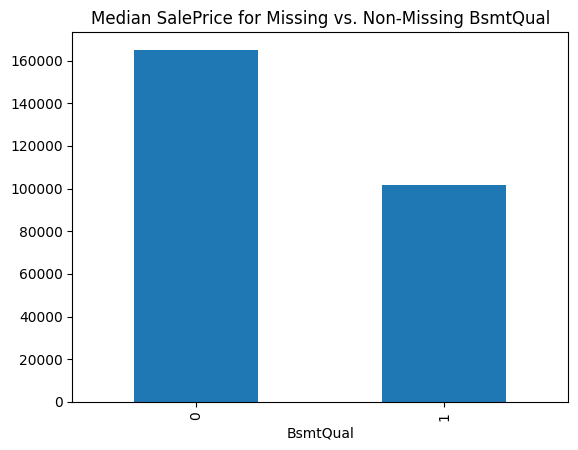

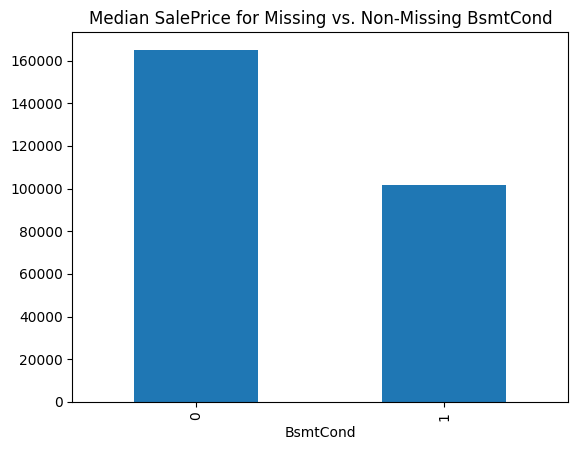

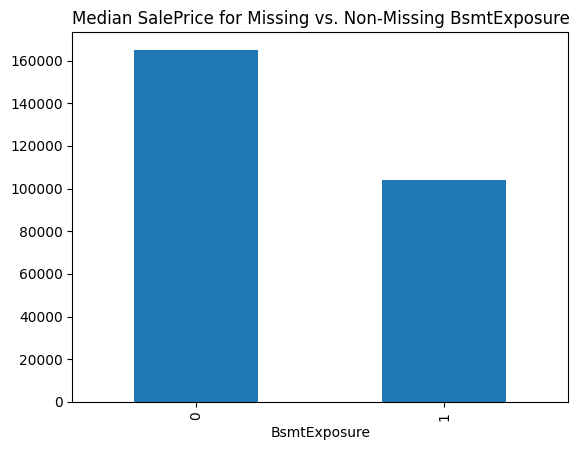

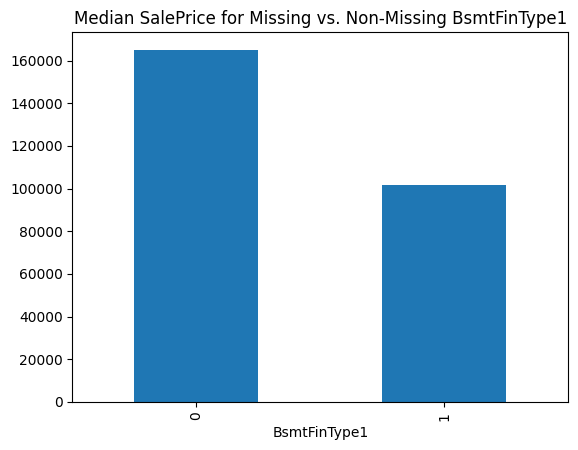

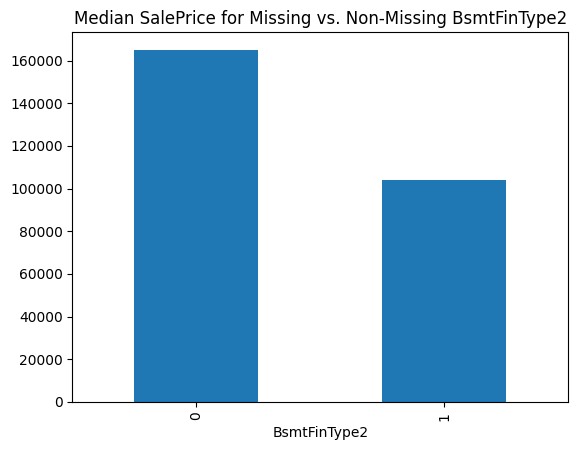

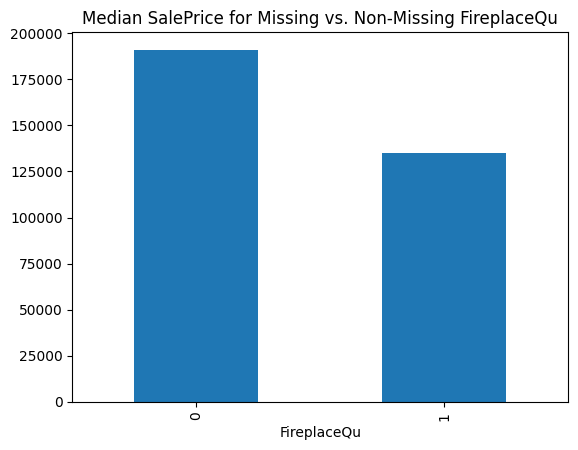

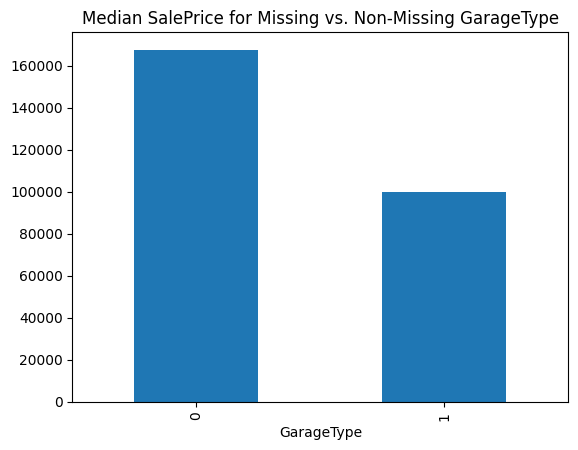

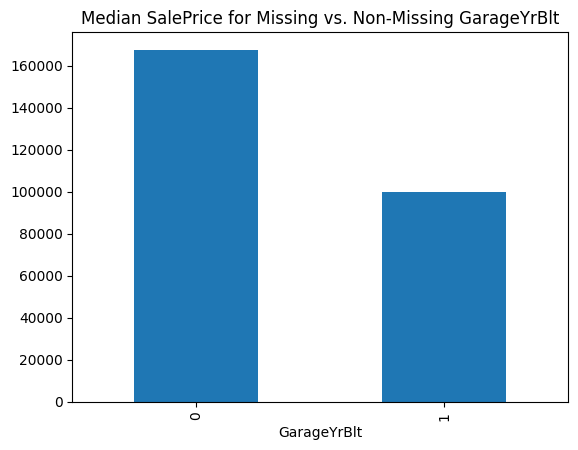

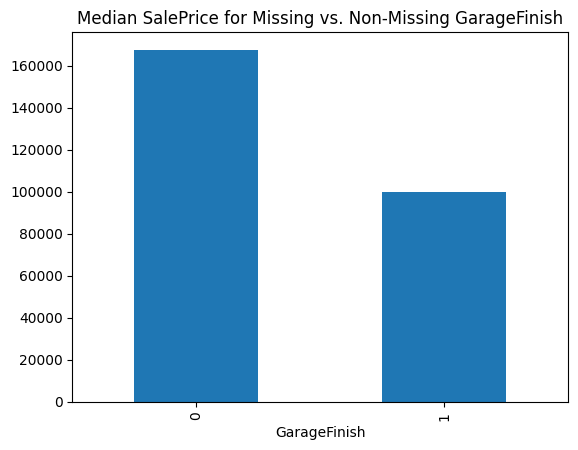

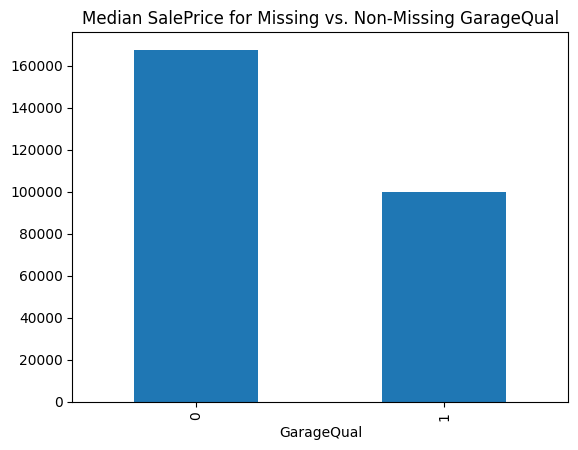

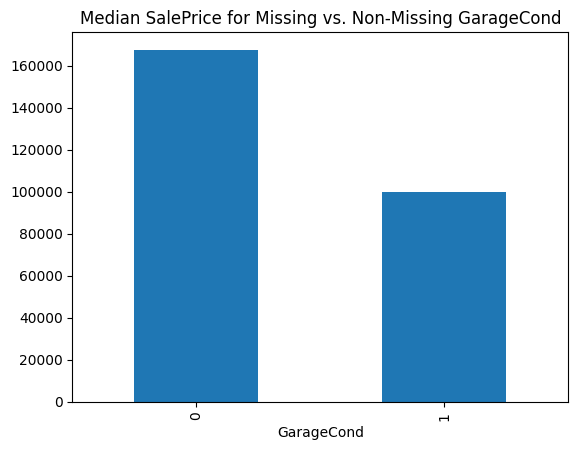

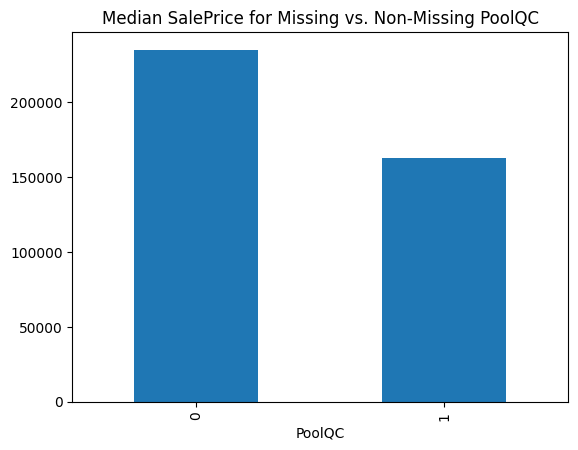

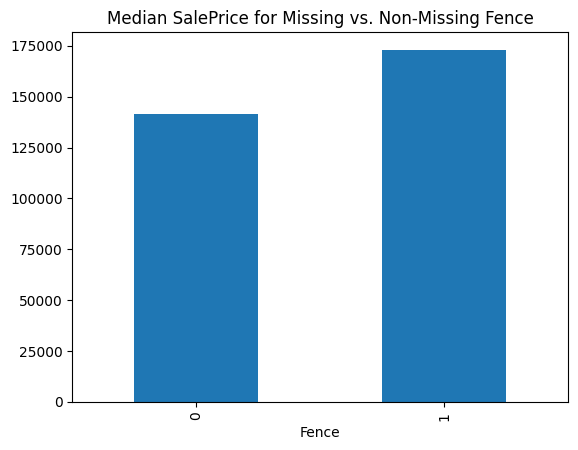

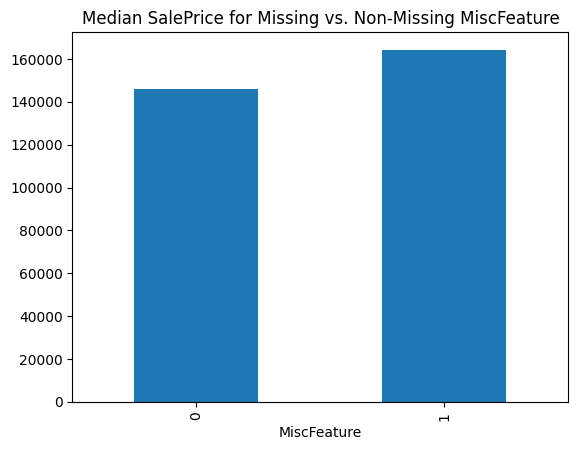

In [9]:
## find relationship between missing values and SalePrice
for feature in features_with_na:
    data = train_data.copy()

    data[feature] = np.where(data[feature].isnull(), 1 ,0)
    grouped_data = data.groupby(feature)['SalePrice'].median()
    grouped_data.plot.bar()
    plt.title(f"Median SalePrice for Missing vs. Non-Missing {feature}")
    plt.show()

In [10]:
train_data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

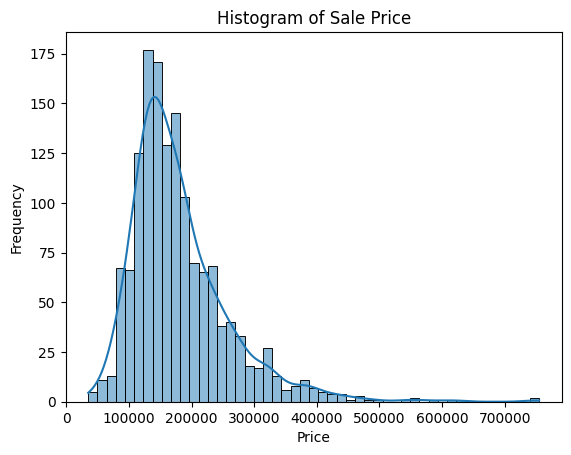

In [11]:
## lets create some plots
import seaborn as sns
sns.histplot(train_data['SalePrice'], kde=True)
plt.title("Histogram of Sale Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


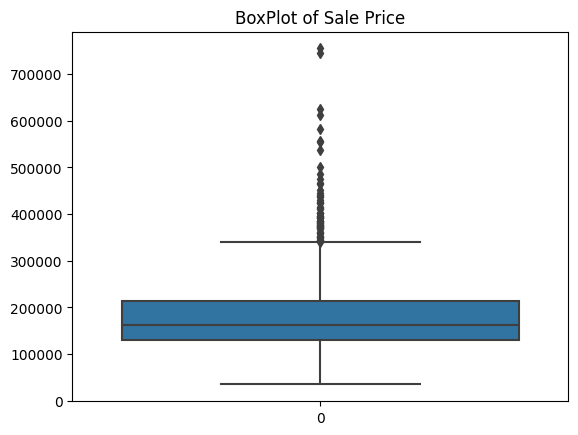

In [12]:
sns.boxplot(train_data['SalePrice'])
plt.title("BoxPlot of Sale Price")
plt.show()

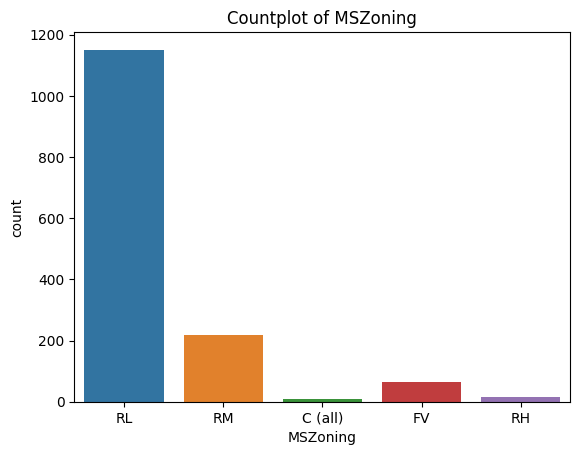

In [13]:
sns.countplot(x='MSZoning', data=train_data)
plt.title('Countplot of MSZoning')
plt.show()

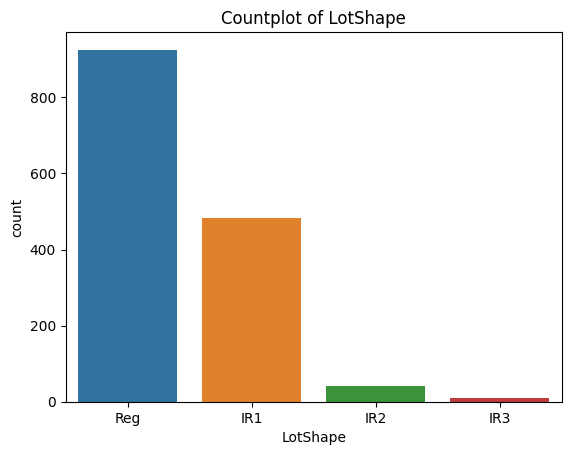

In [14]:
sns.countplot(x='LotShape', data=train_data)
plt.title('Countplot of LotShape')
plt.show()

In [15]:
## numerical features
numerical_features = [col for col in train_data.columns if train_data[col].dtype not in ['object', 'category']]
print(numerical_features)
print(len(numerical_features))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38


In [16]:
train_data[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## Temporal Variables(eg - datetime)

In [17]:
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
for feature in year_features:
    print(feature, " : ", train_data[feature].unique())

YearBuilt  :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd  :  [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt  :  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.


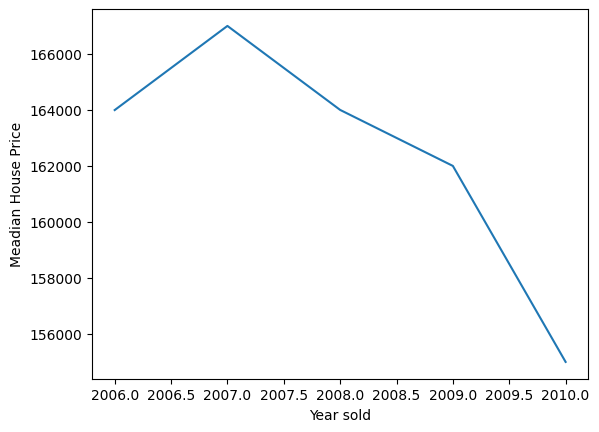

In [19]:
## year sold vs sale price :

train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Meadian House Price')
plt.show()

In [20]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

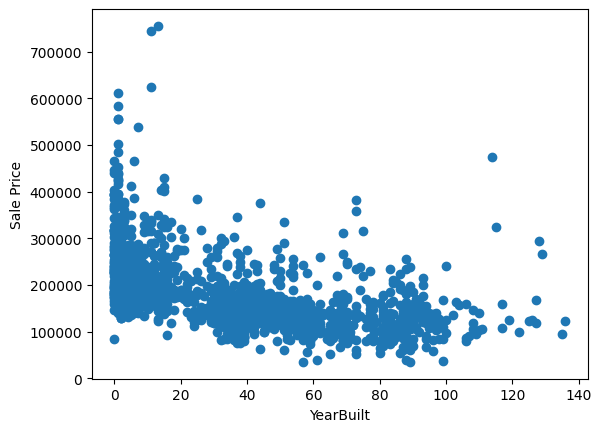

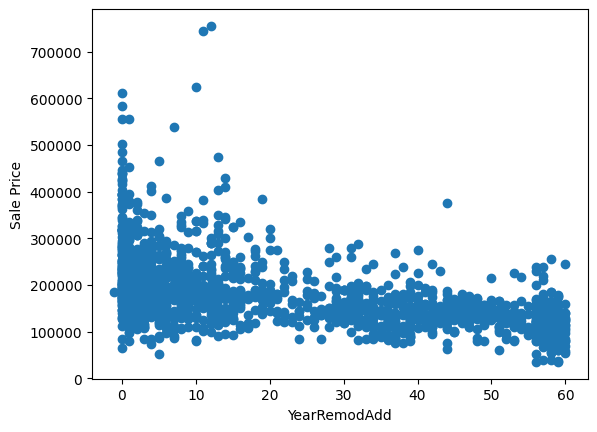

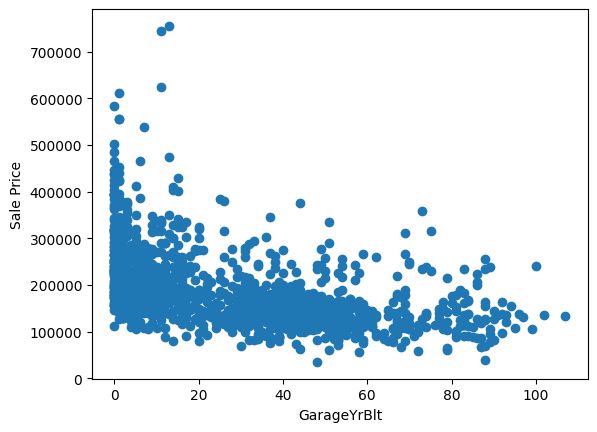

In [21]:
for feature in year_features:
    if feature != 'YrSold':
        data = train_data.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

In [22]:
## 1. Continous variable and Discrete Variables
discrete_features = [feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature not in year_features+['Id']]
print(len(discrete_features))
discrete_features

17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [23]:
train_data[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


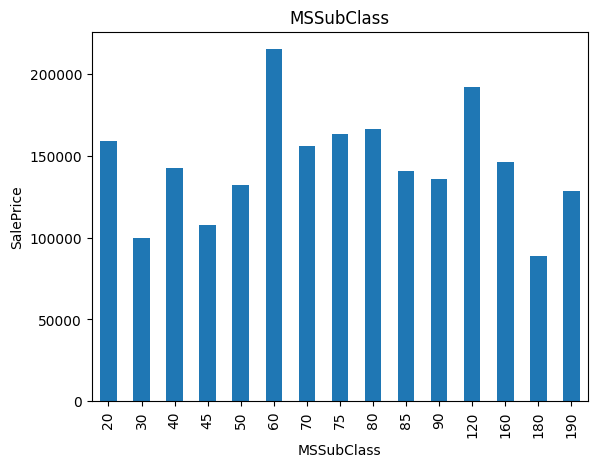

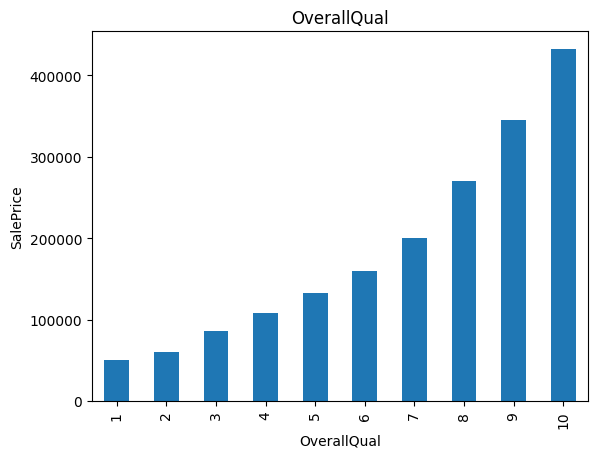

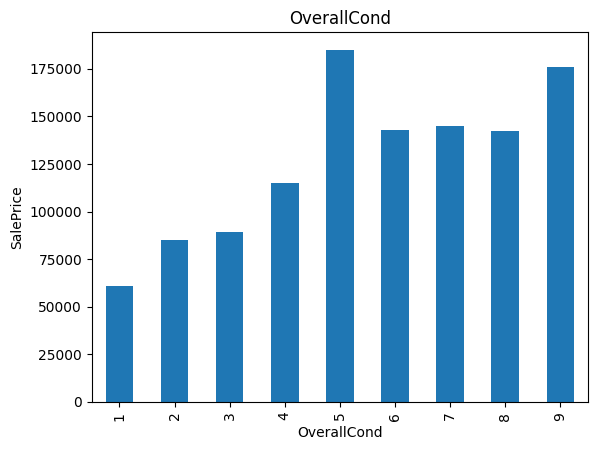

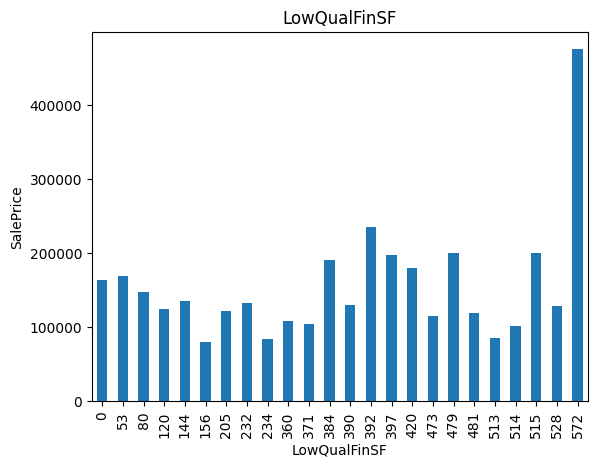

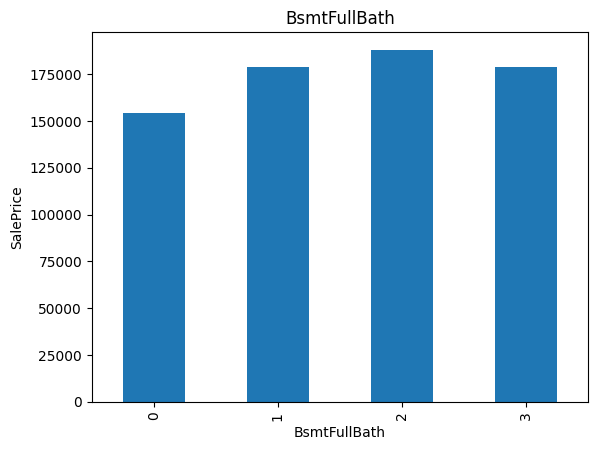

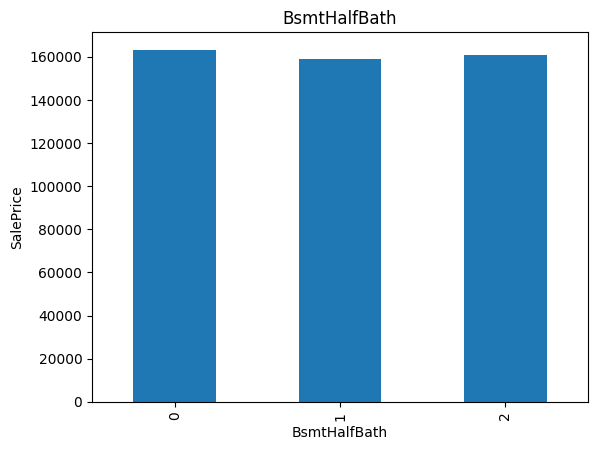

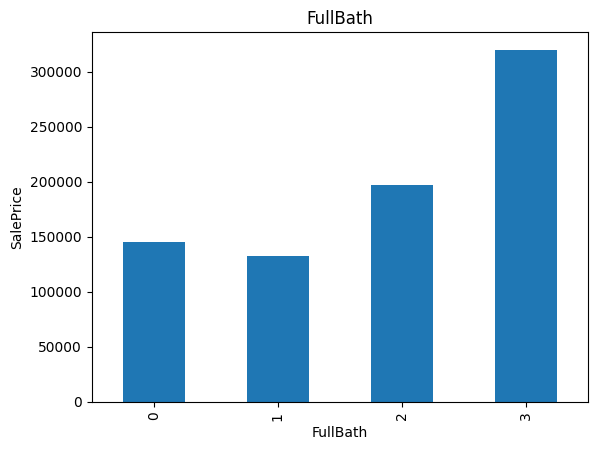

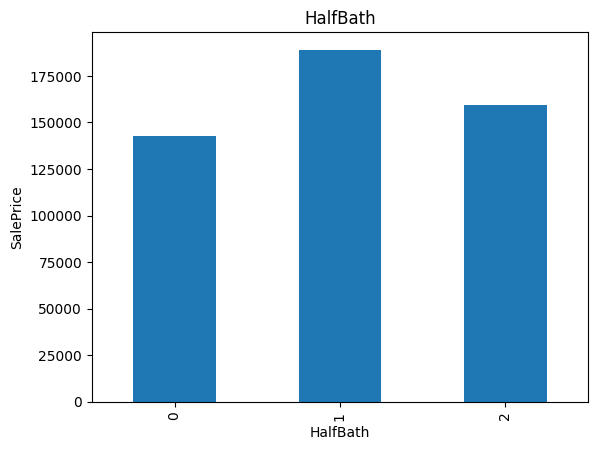

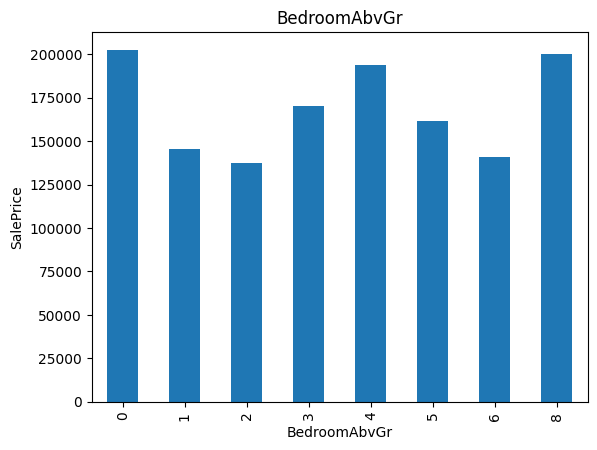

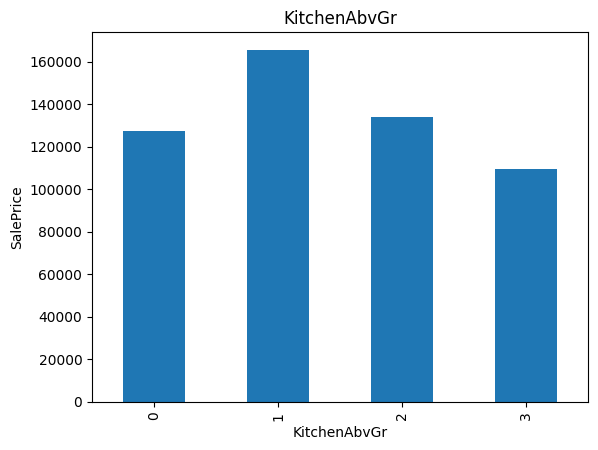

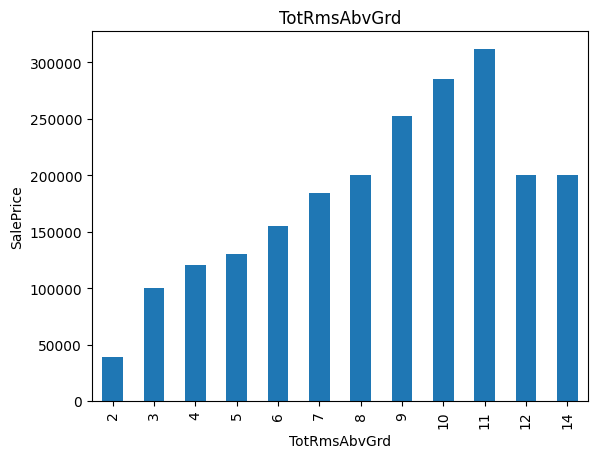

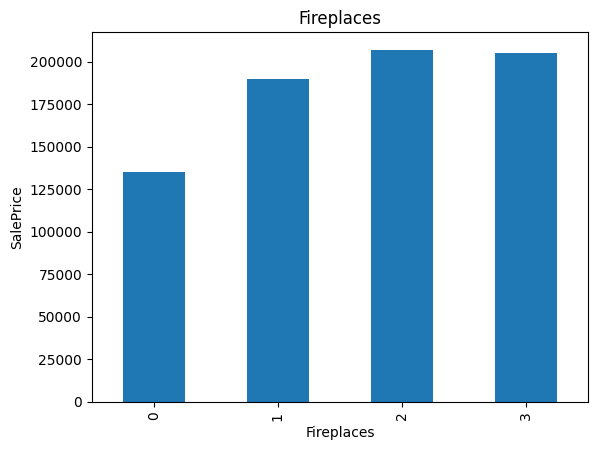

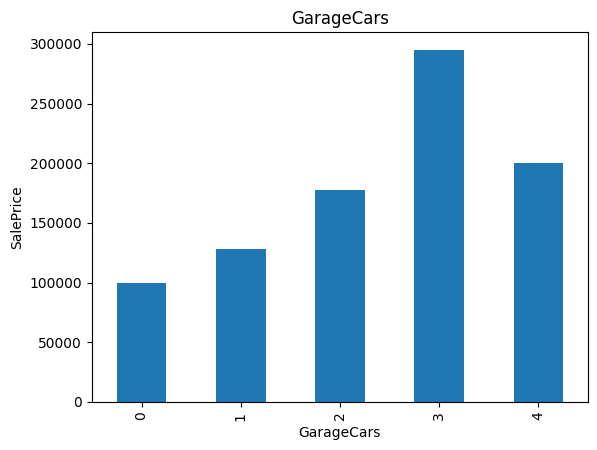

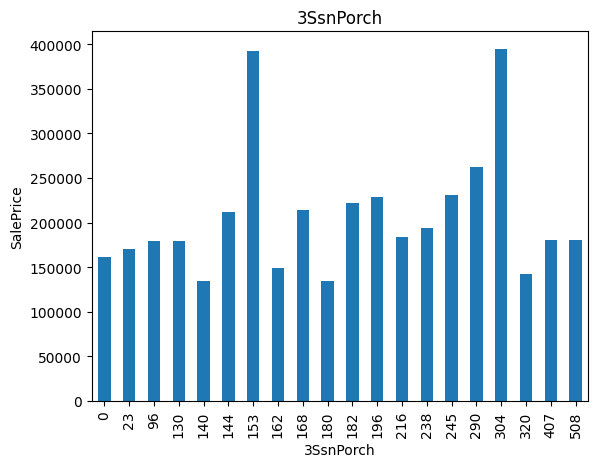

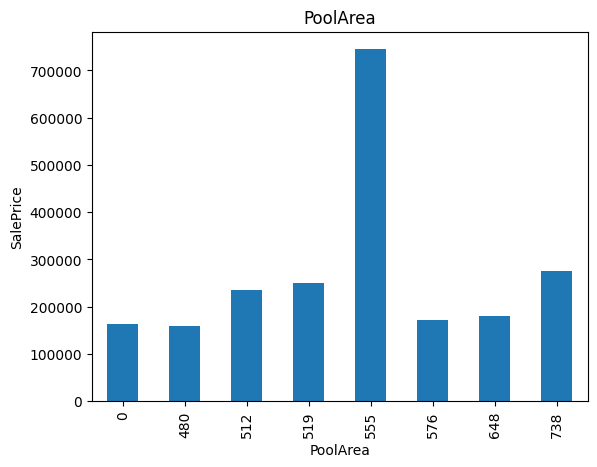

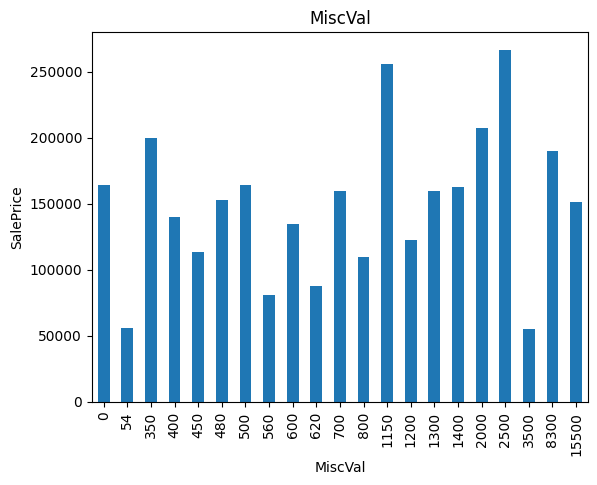

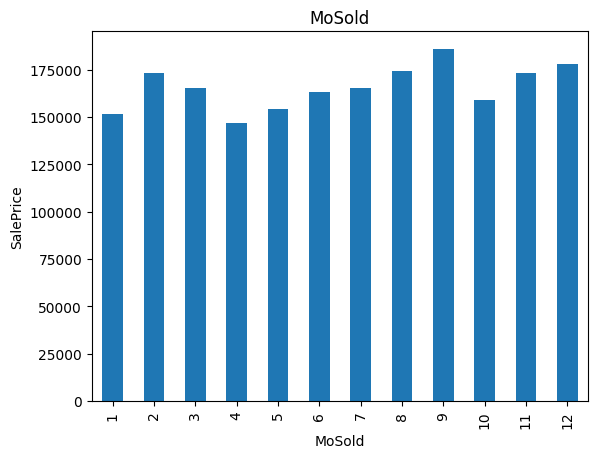

In [24]:
## relationship between discrete features and sales price
for feature in discrete_features:
    data = train_data.copy()
    grouped_data = data.groupby(feature)['SalePrice'].median()
    grouped_data.plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Continuous features

In [25]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
print(len(continuous_features))
continuous_features

16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

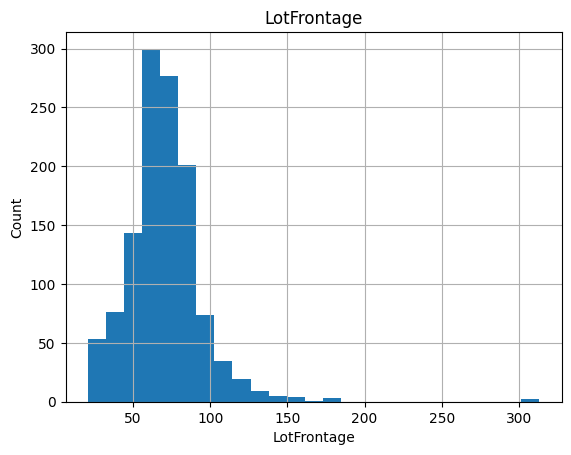

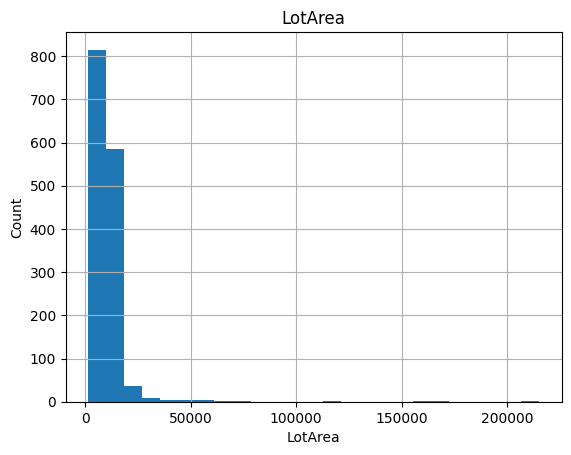

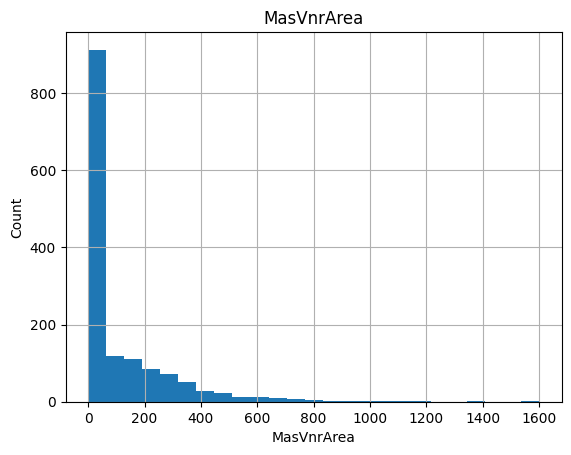

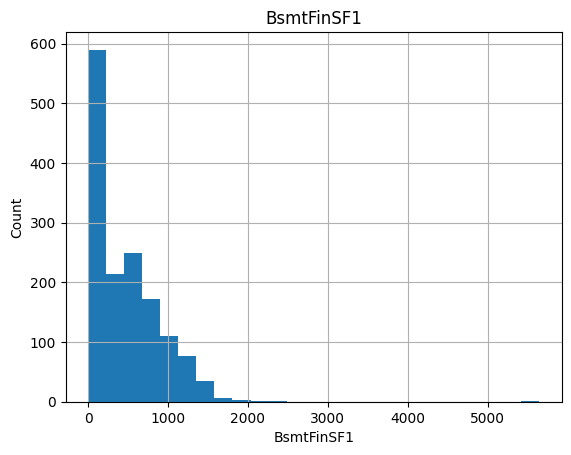

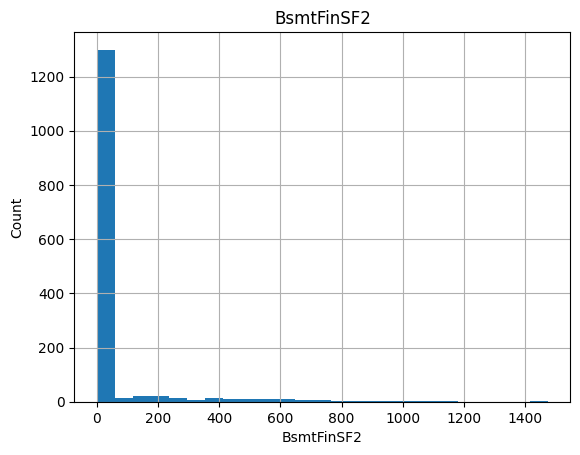

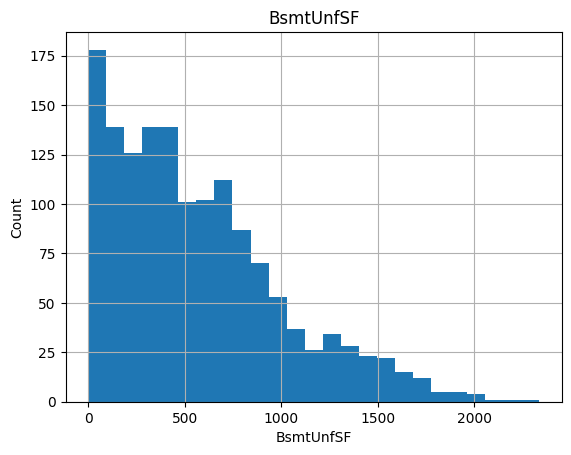

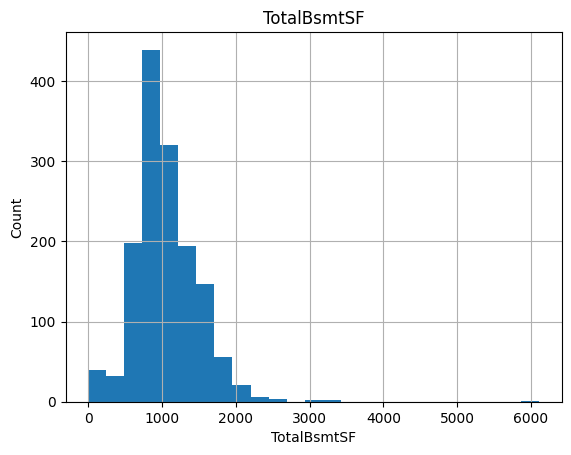

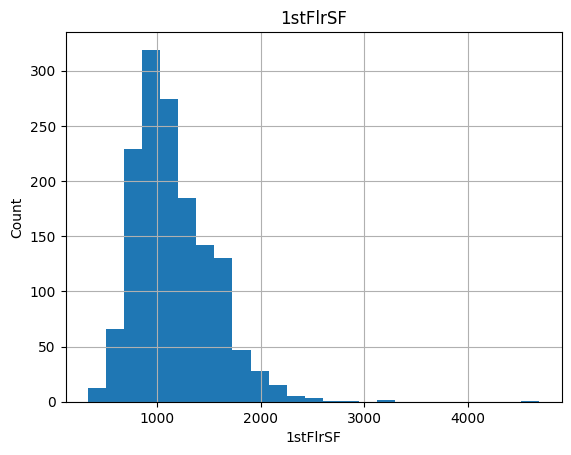

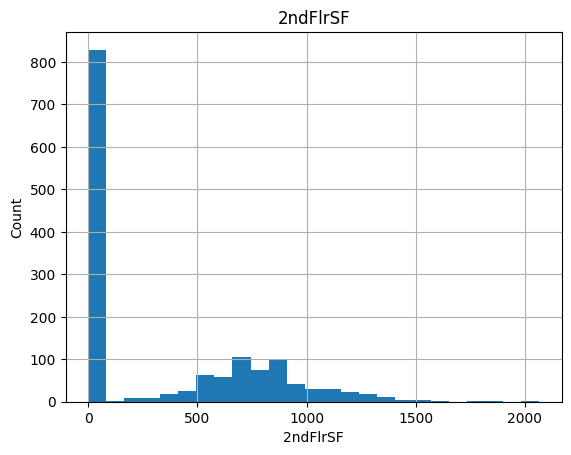

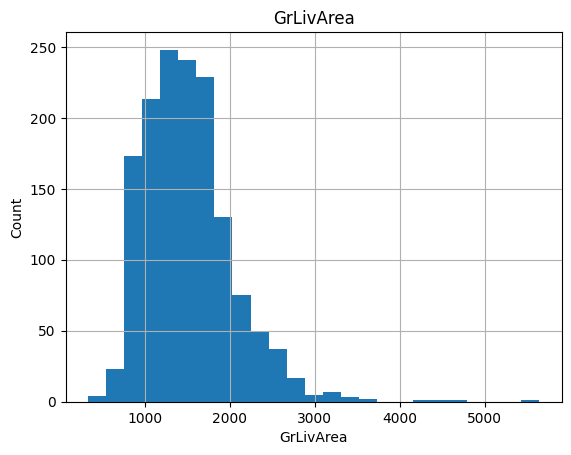

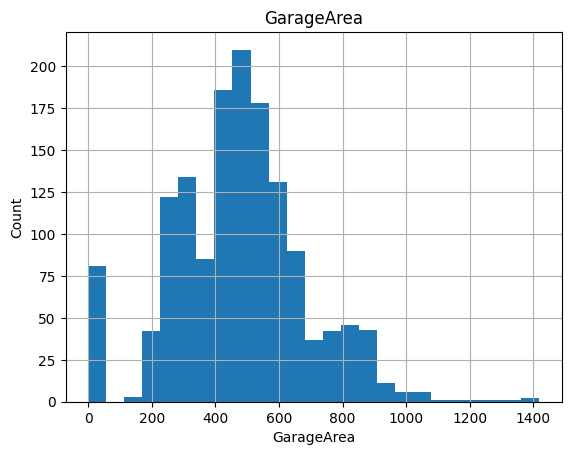

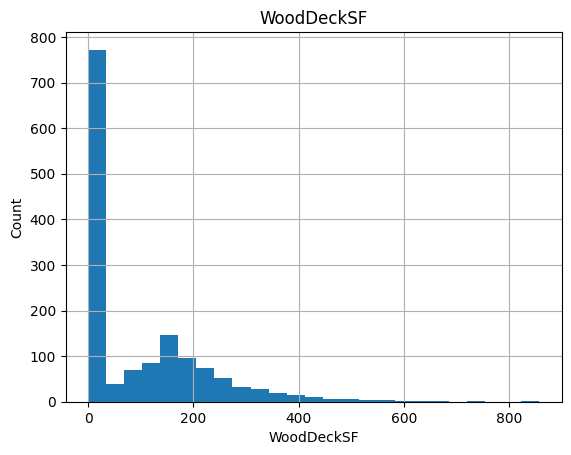

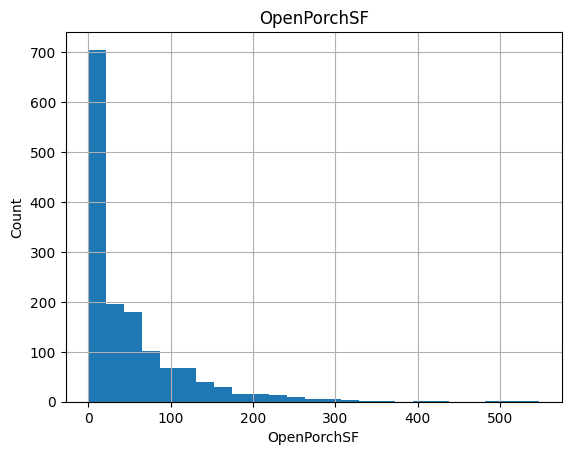

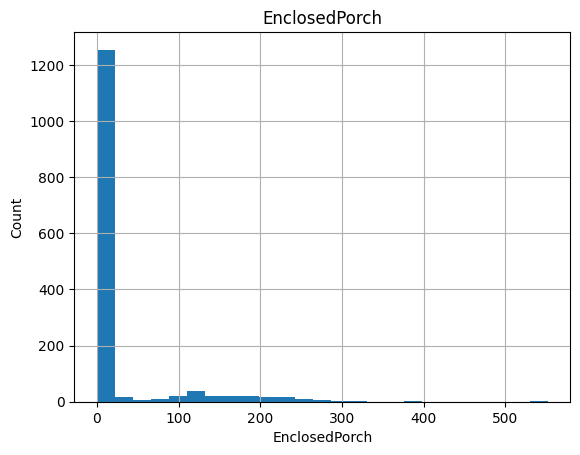

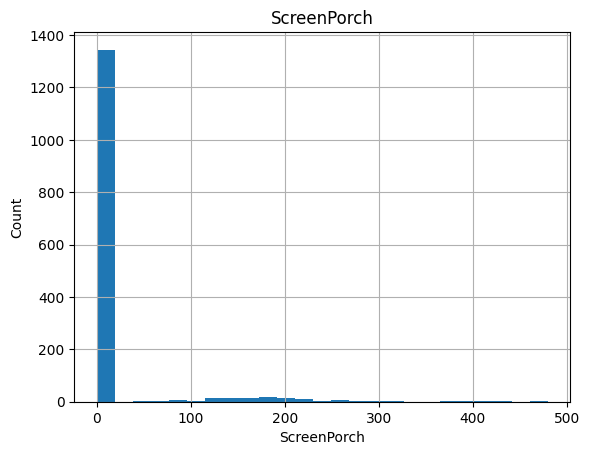

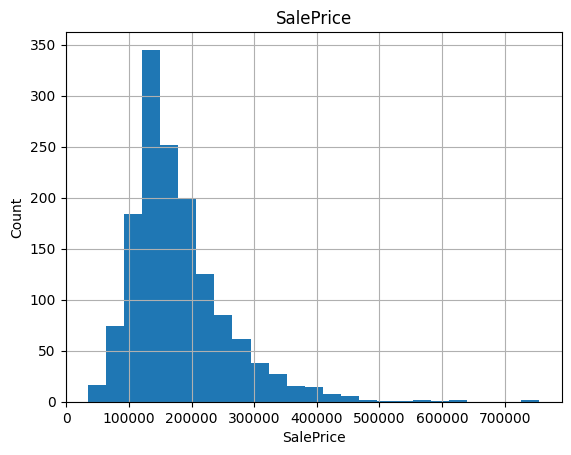

In [26]:
## histograms for continuous features
for feature in continuous_features:
    data= train_data.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### logrithmic transformation for continuous features

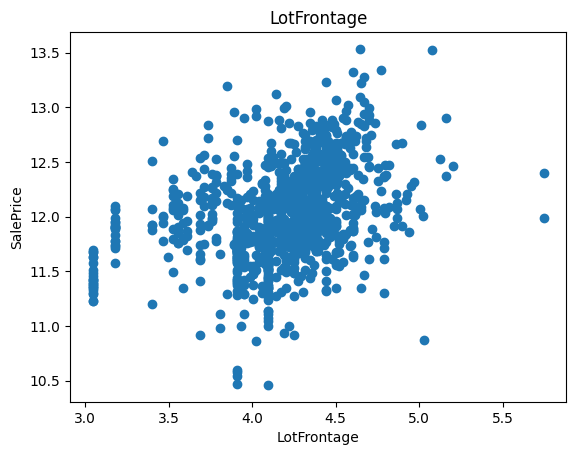

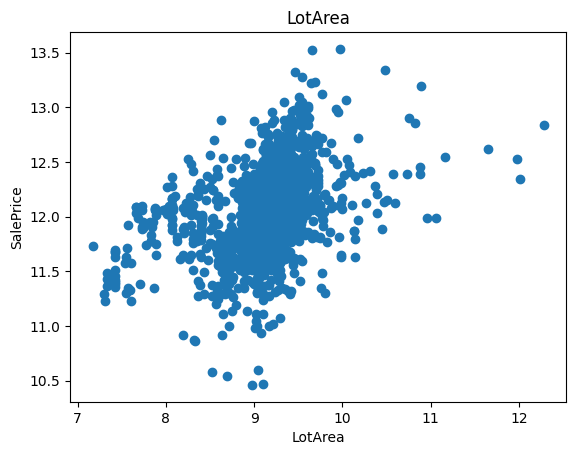

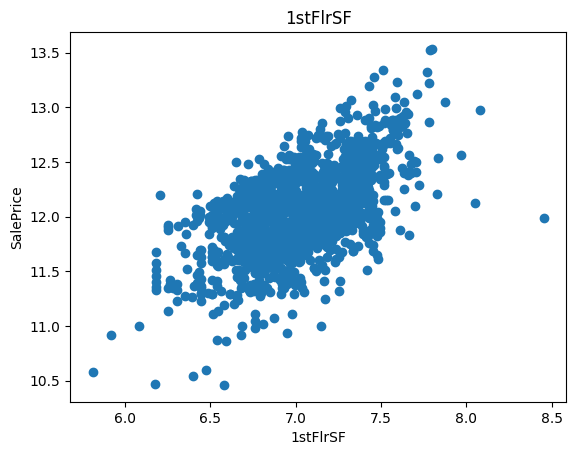

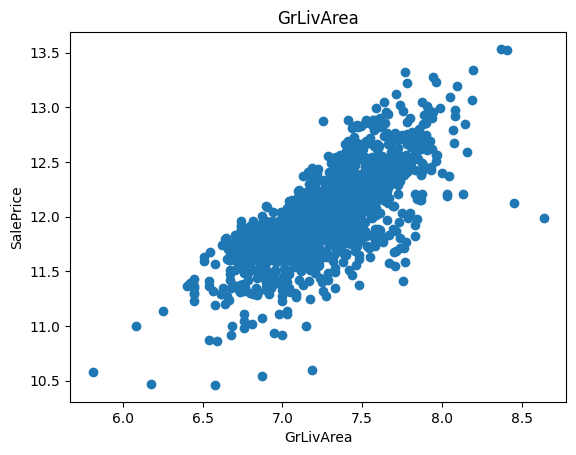

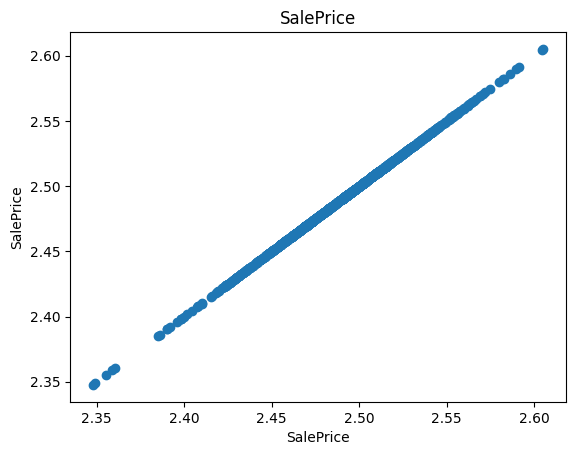

In [27]:
for feature in continuous_features:
    data = train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()


### Outliers in continuous features

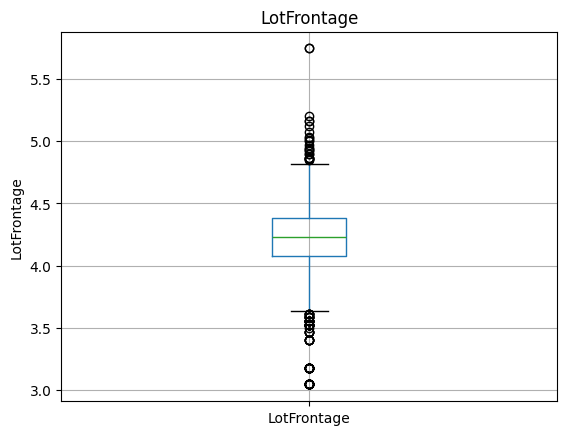

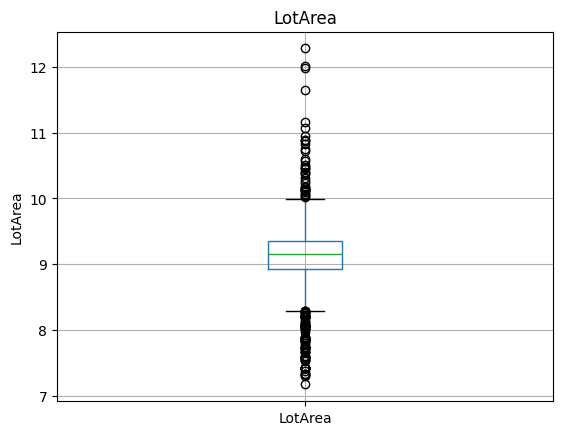

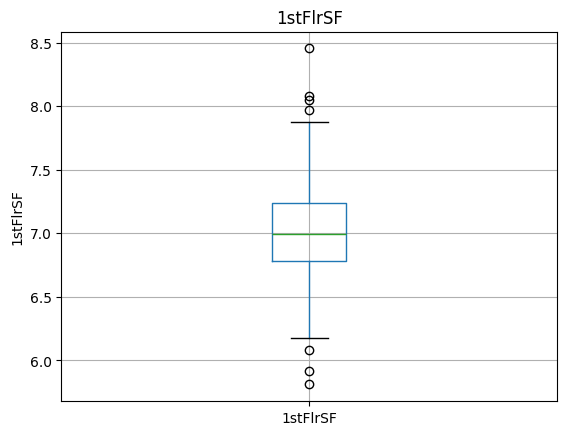

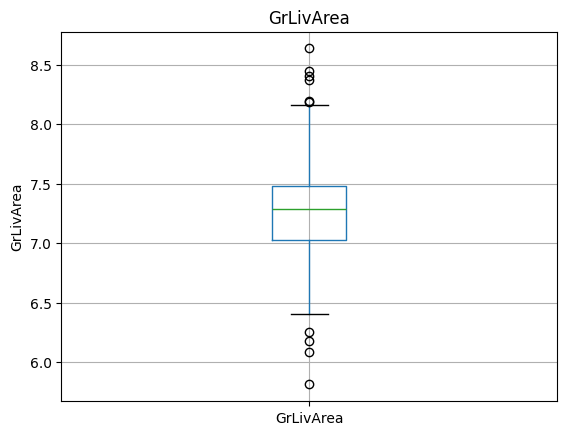

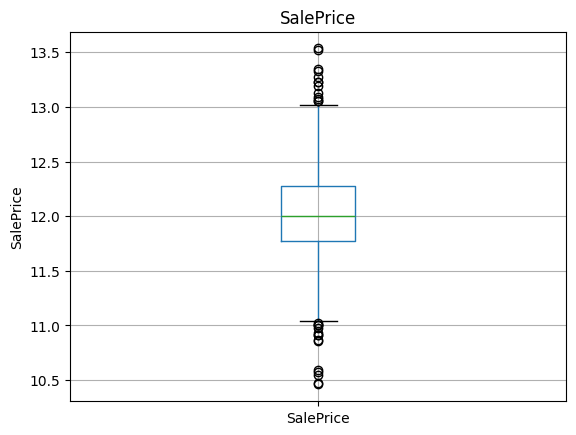

In [28]:
for feature in continuous_features:
    data = train_data.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### categorical features

In [29]:
categorical_features = [col for col in train_data.columns if train_data[col].dtype in ['object', 'category']]
print(categorical_features)
print(len(categorical_features))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [30]:
train_data[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
for feature in categorical_features:
    print('The feature is : {} and number of categories are : {}'.format(feature,len(train_data[feature].unique())))

The feature is : MSZoning and number of categories are : 5
The feature is : Street and number of categories are : 2
The feature is : Alley and number of categories are : 3
The feature is : LotShape and number of categories are : 4
The feature is : LandContour and number of categories are : 4
The feature is : Utilities and number of categories are : 2
The feature is : LotConfig and number of categories are : 5
The feature is : LandSlope and number of categories are : 3
The feature is : Neighborhood and number of categories are : 25
The feature is : Condition1 and number of categories are : 9
The feature is : Condition2 and number of categories are : 8
The feature is : BldgType and number of categories are : 5
The feature is : HouseStyle and number of categories are : 8
The feature is : RoofStyle and number of categories are : 6
The feature is : RoofMatl and number of categories are : 8
The feature is : Exterior1st and number of categories are : 15
The feature is : Exterior2nd and number

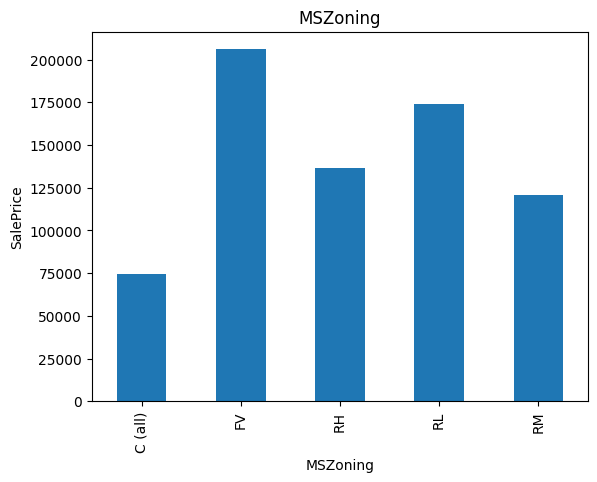

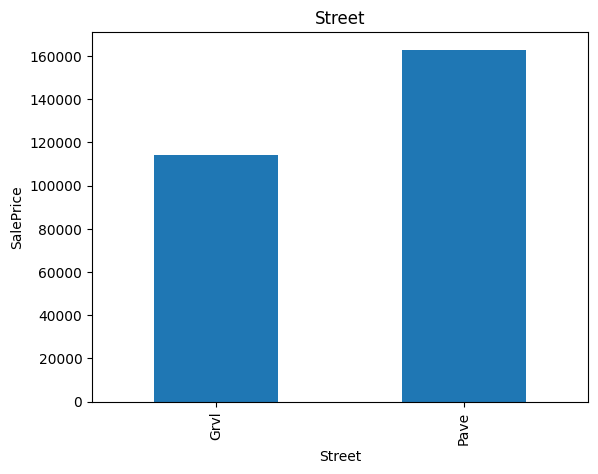

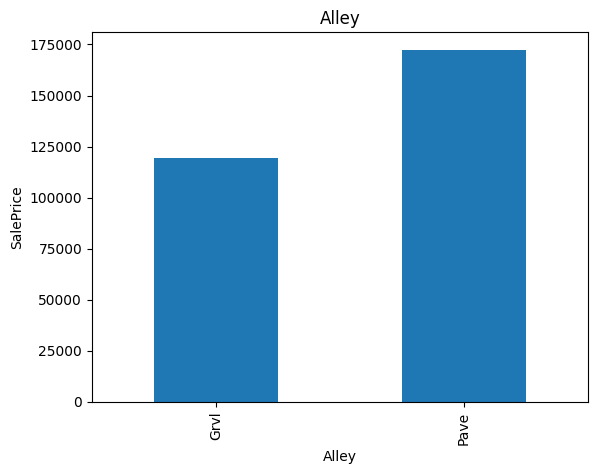

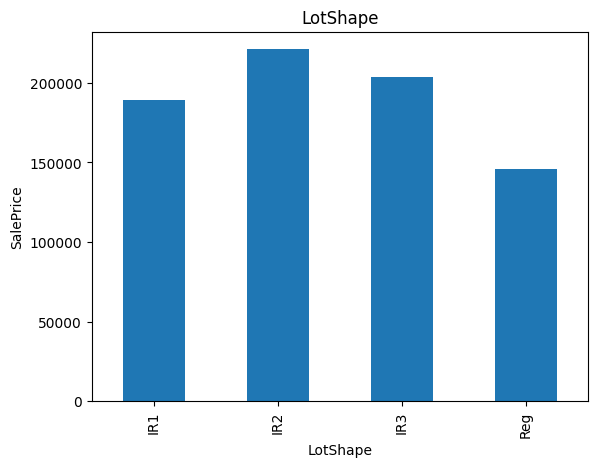

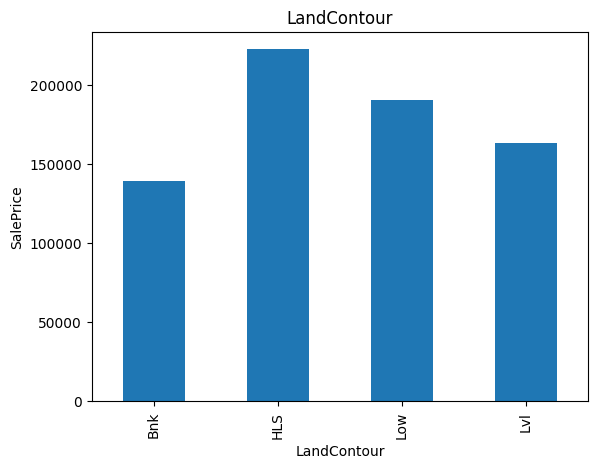

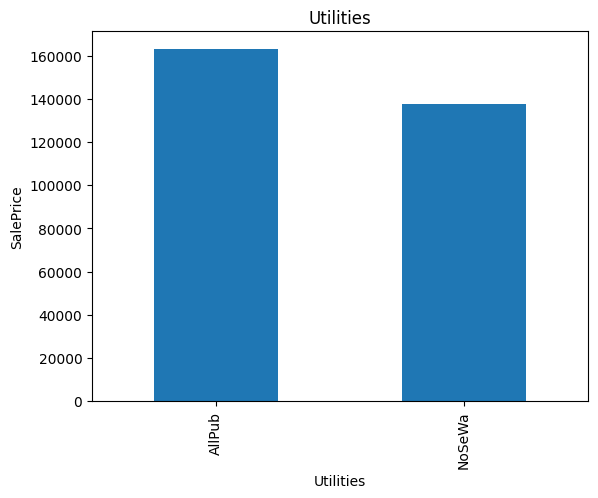

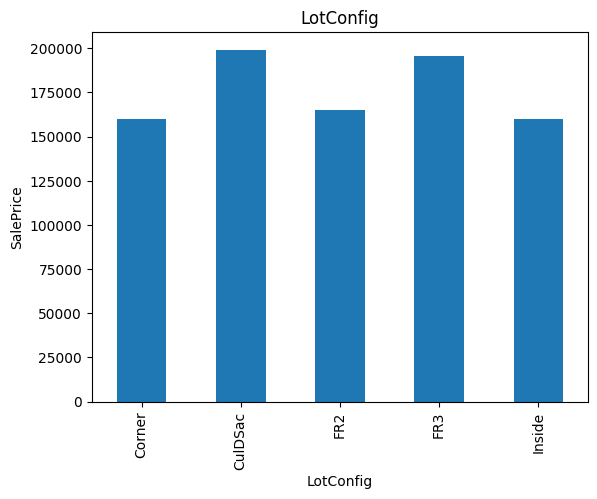

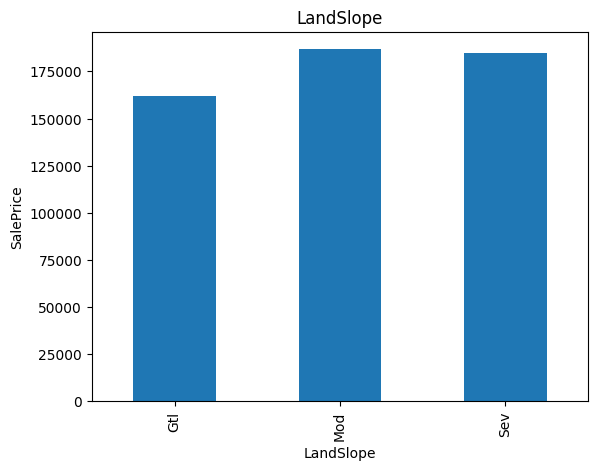

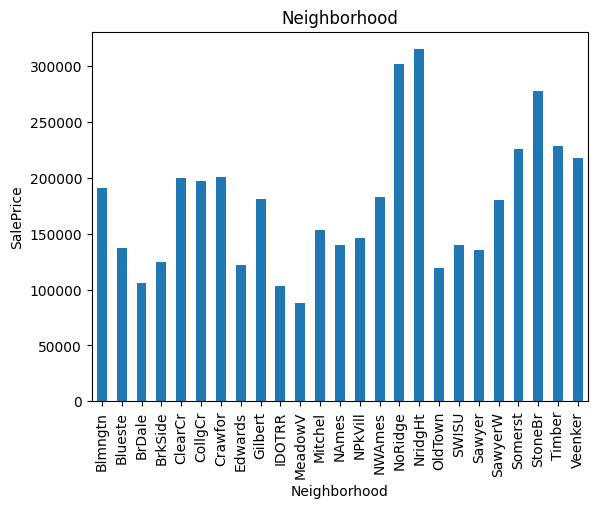

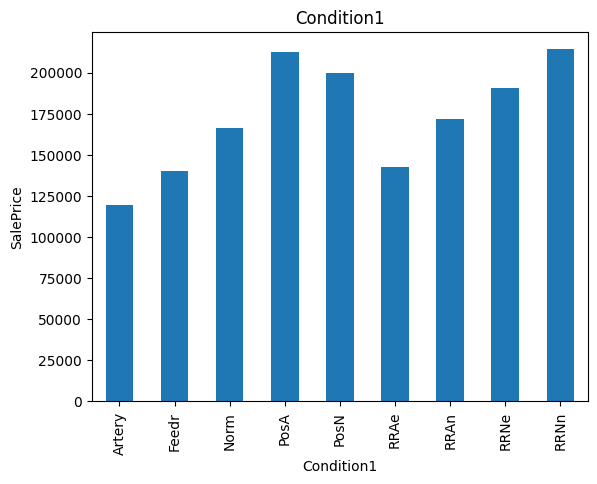

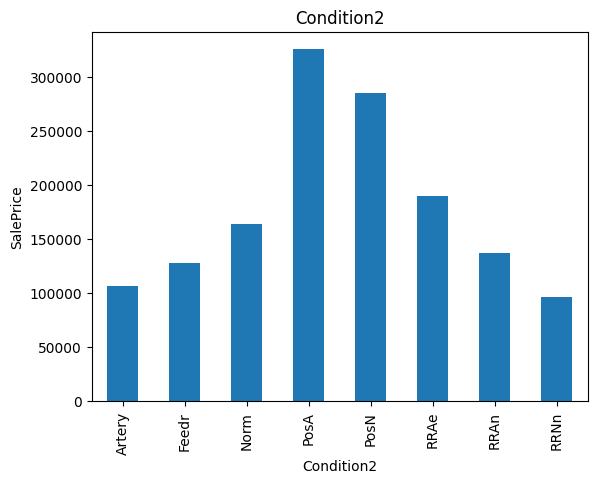

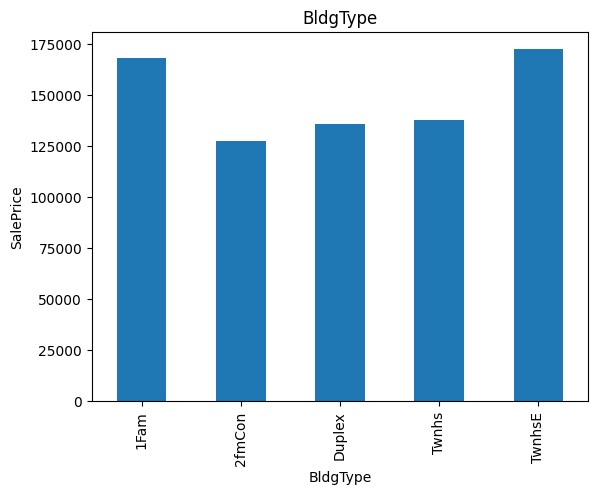

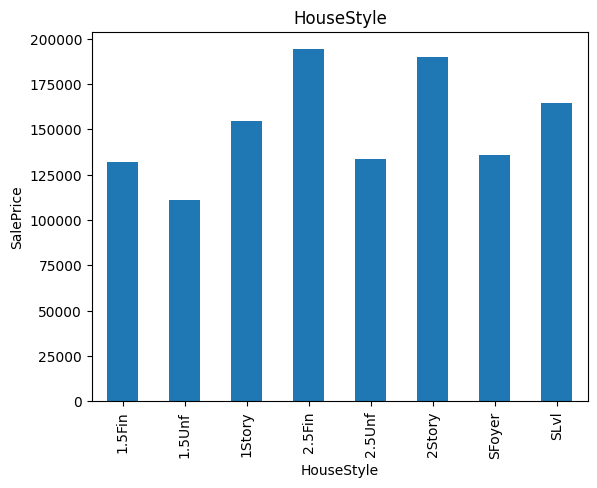

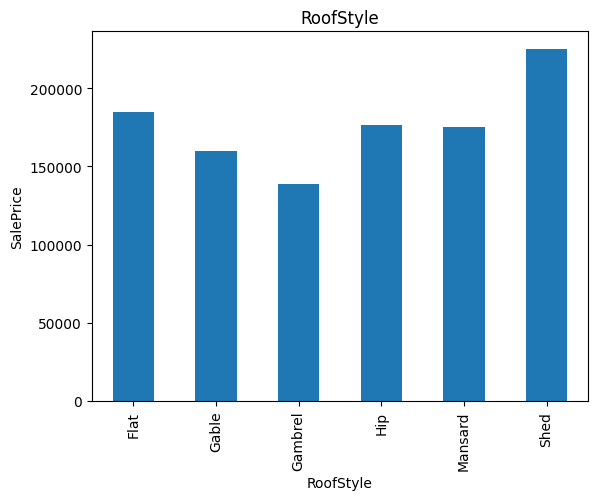

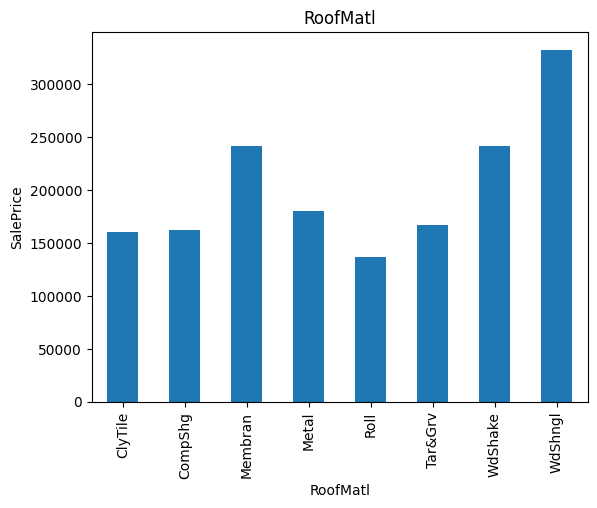

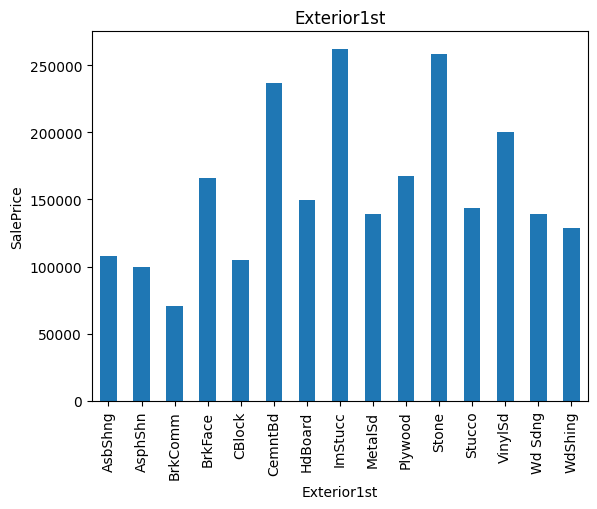

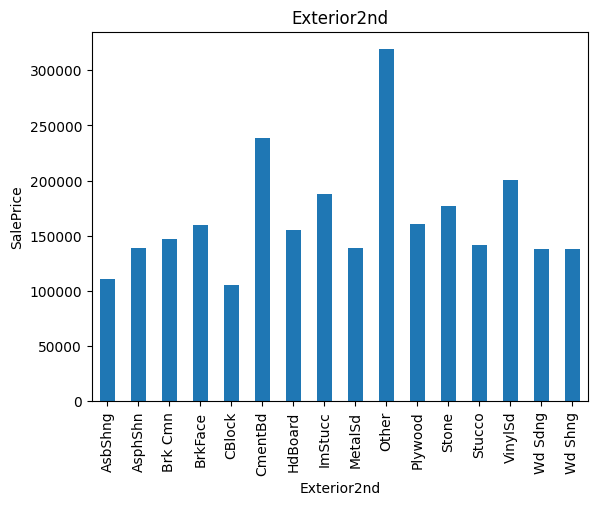

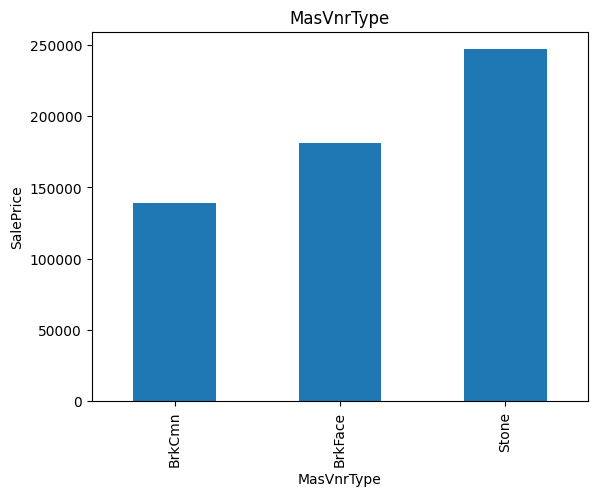

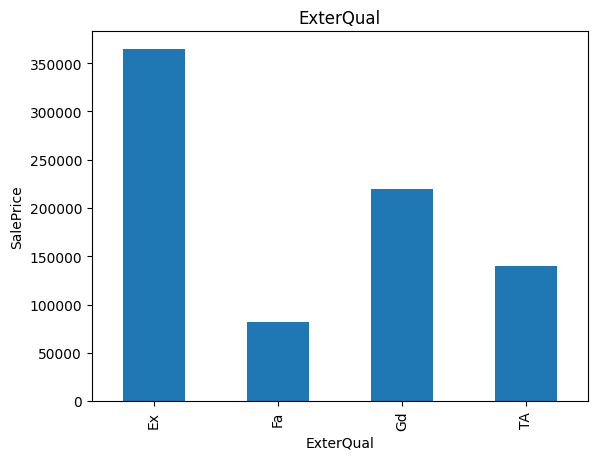

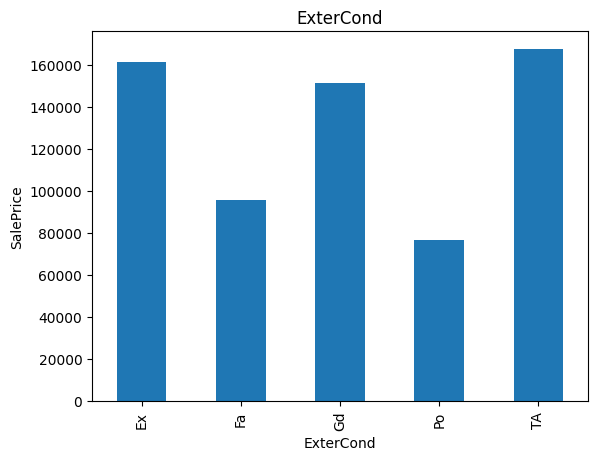

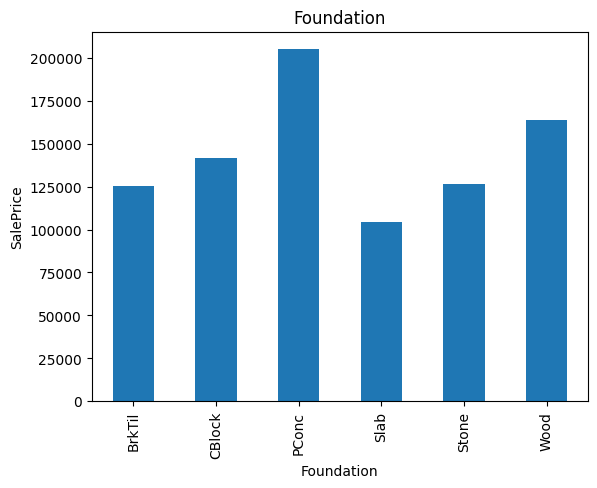

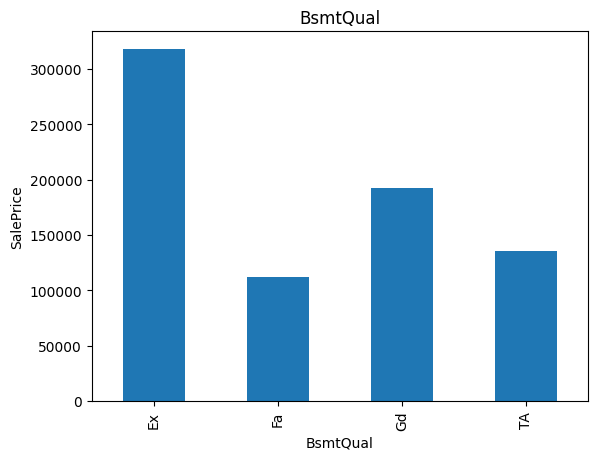

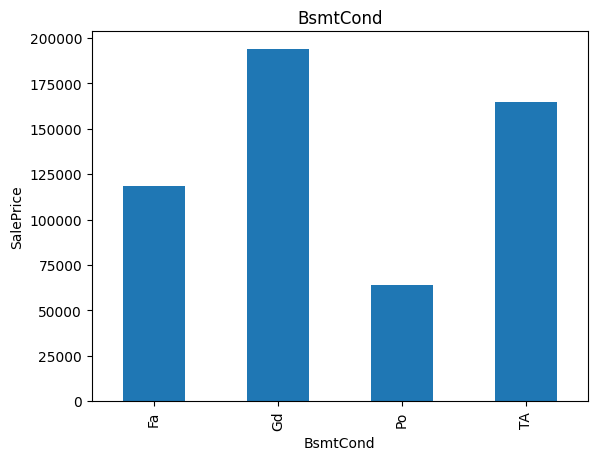

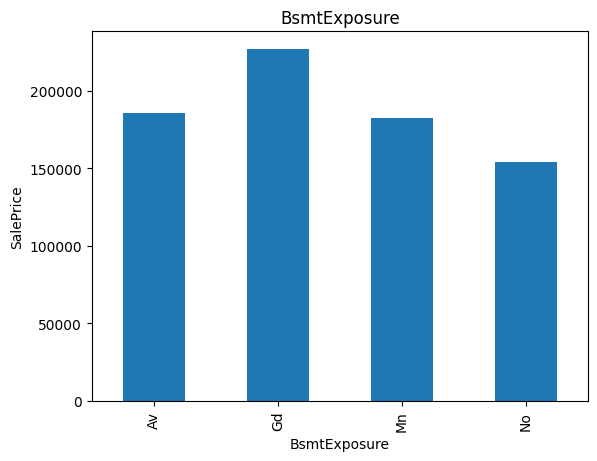

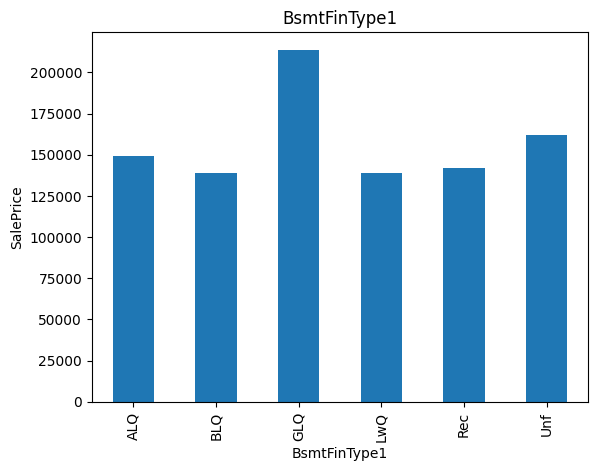

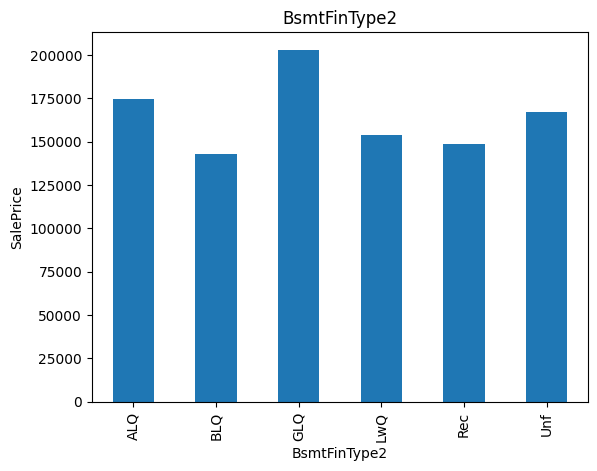

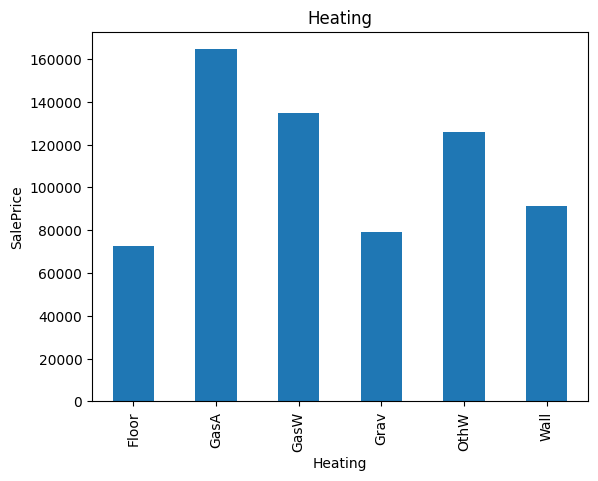

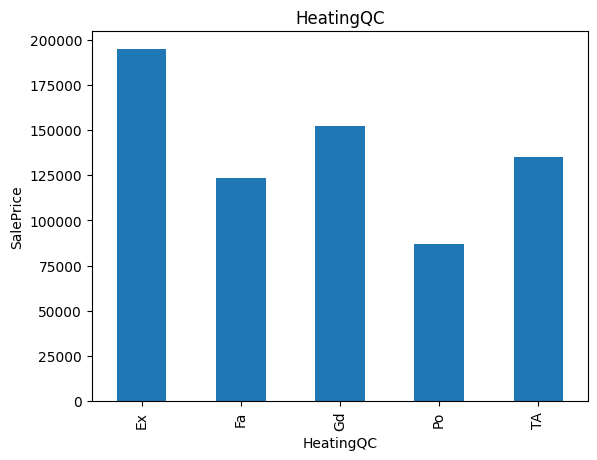

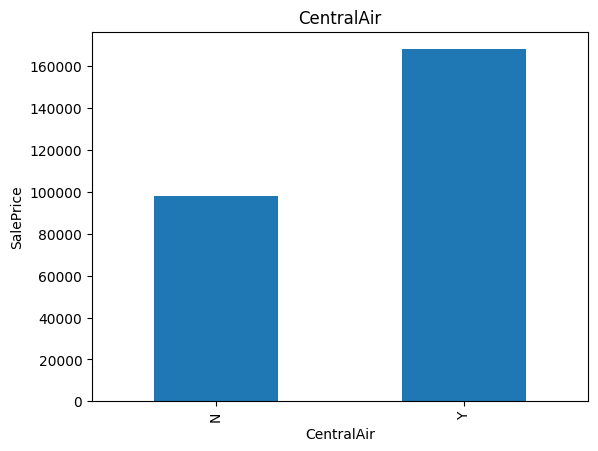

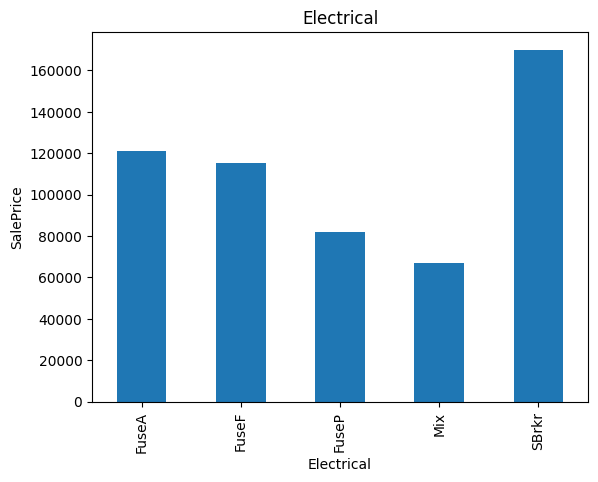

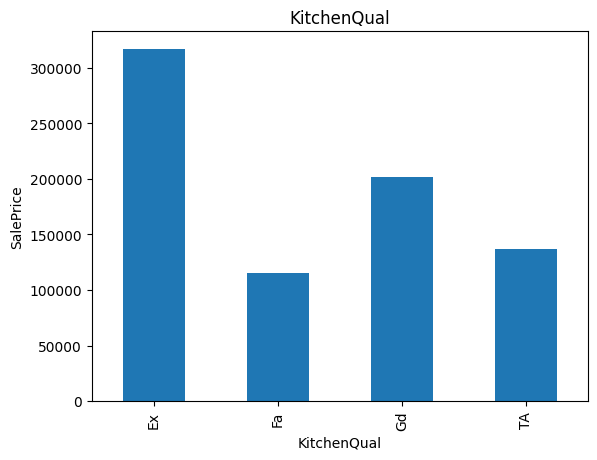

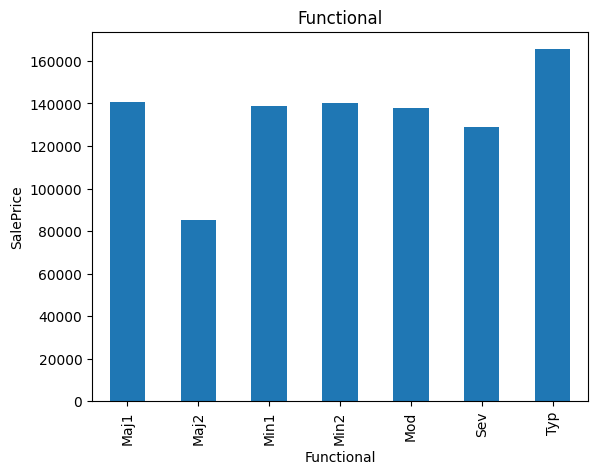

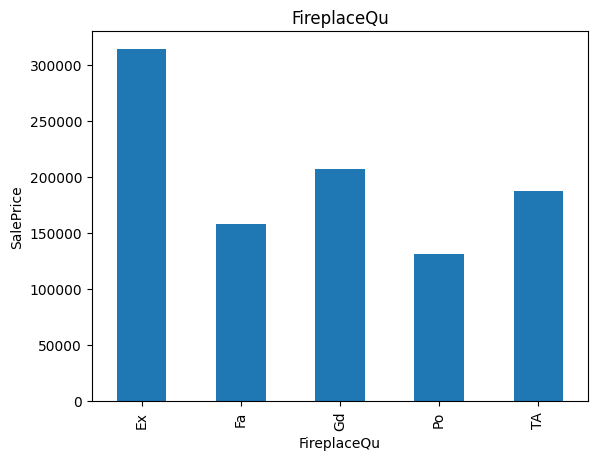

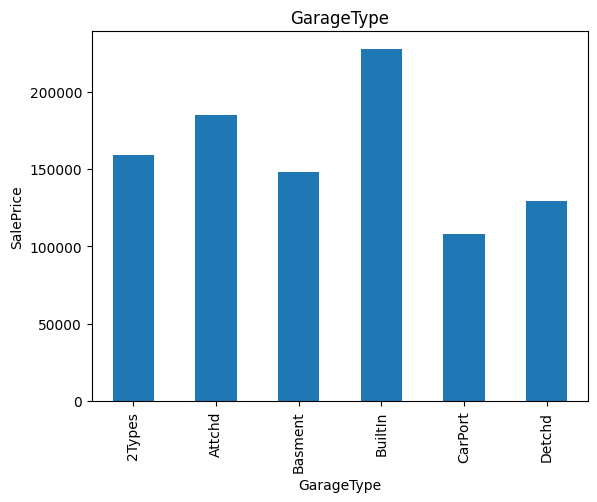

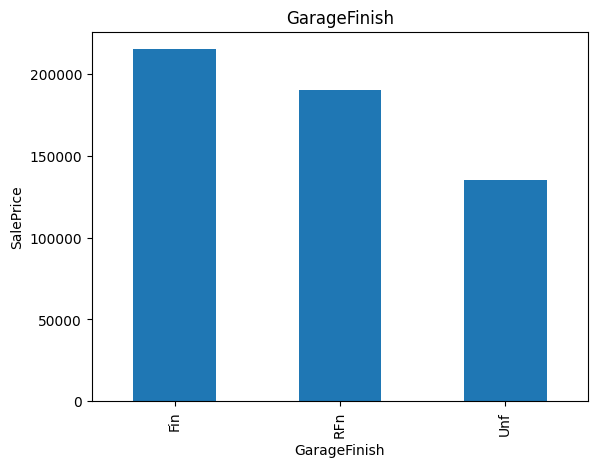

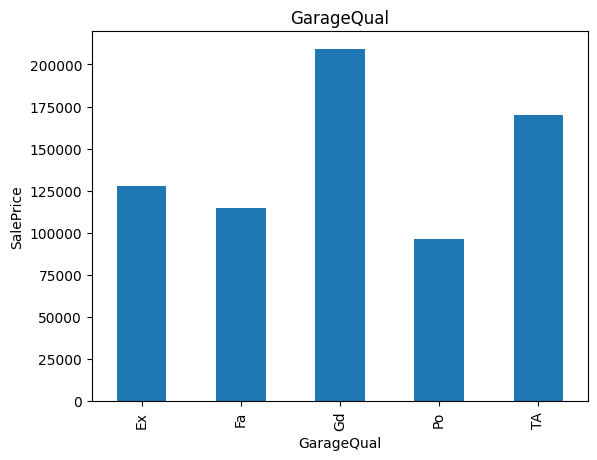

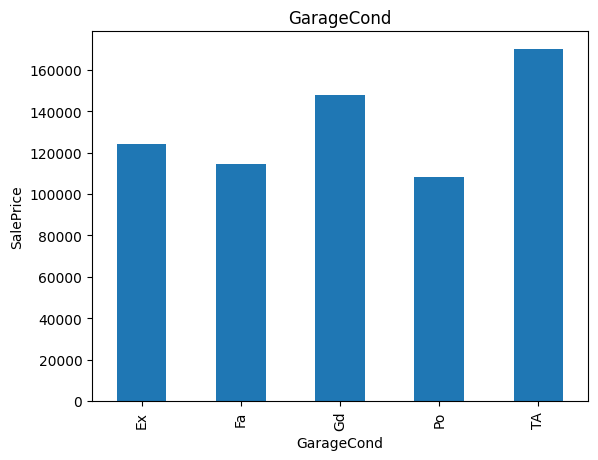

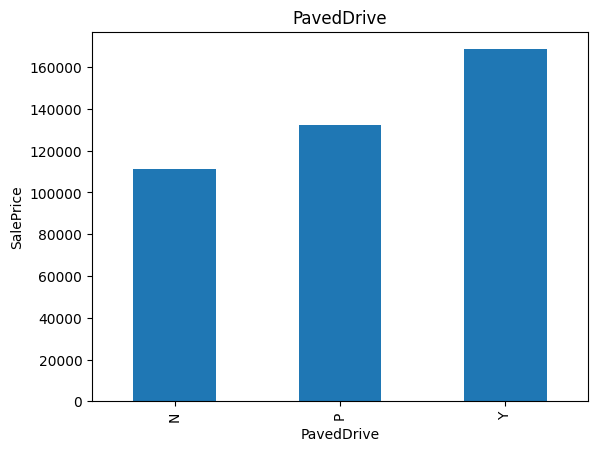

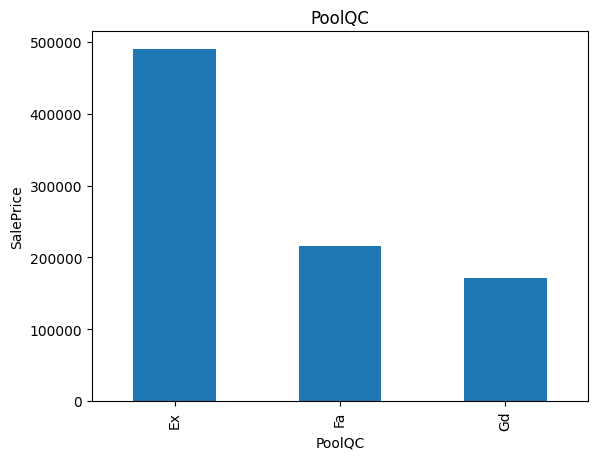

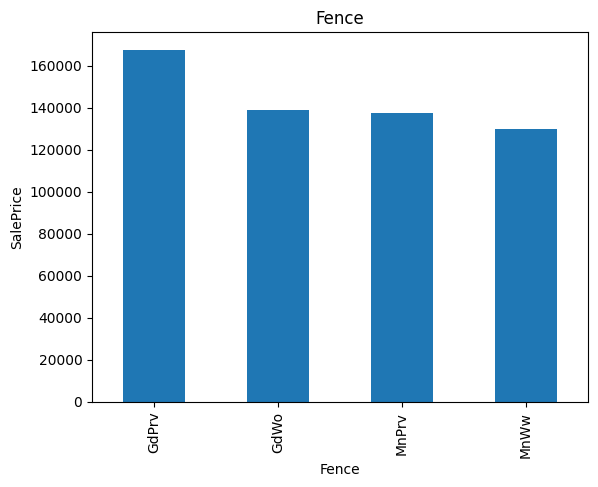

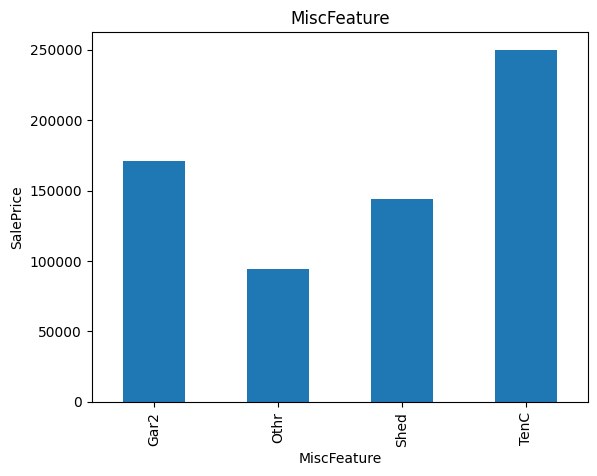

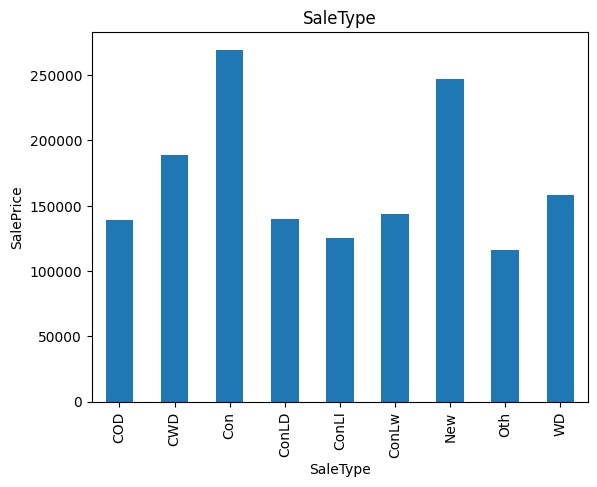

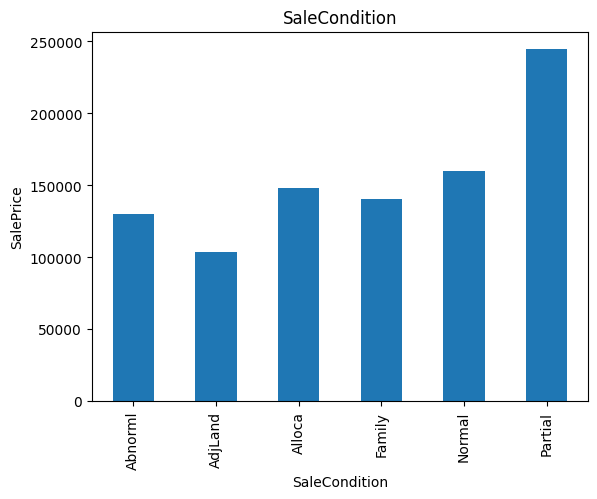

In [32]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data = train_data.copy()
    grouped_data = data.groupby(feature)['SalePrice'].median()
    grouped_data.plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## 2.Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

#### 1. Missing Values

In [33]:
categorical_features_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes =='O']

for feature in categorical_features_nan:
    print("{} : {} % missing values".format(feature, np.round(train_data[feature].isnull().mean(), 4)))

Alley : 0.9377 % missing values
MasVnrType : 0.5973 % missing values
BsmtQual : 0.0253 % missing values
BsmtCond : 0.0253 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.0253 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.4726 % missing values
GarageType : 0.0555 % missing values
GarageFinish : 0.0555 % missing values
GarageQual : 0.0555 % missing values
GarageCond : 0.0555 % missing values
PoolQC : 0.9952 % missing values
Fence : 0.8075 % missing values
MiscFeature : 0.963 % missing values


In [34]:
## replace missing values with new label as "Missing"
def replace_cat_feature(dataset, features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data 

train_data = replace_cat_feature(train_data, categorical_features_nan)
train_data[categorical_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [35]:
# train_data.head()

In [36]:
numerical_with_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes != 'O']

for feature in numerical_with_nan:
    print("{} : {} % missing values".format(feature, np.round(train_data[feature].isnull().mean(), 4)))

LotFrontage : 0.1774 % missing values
MasVnrArea : 0.0055 % missing values
GarageYrBlt : 0.0555 % missing values


In [37]:
for feature in numerical_with_nan:
    meadian_value = train_data[feature].median()

    train_data[feature+'_nan'] = np.where(train_data[feature].isnull(), 1, 0)
    train_data[feature].fillna(meadian_value, inplace=True)

train_data[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
# train_data.head(50)

In [39]:
# Temporal Variables (Date Time Variables)
## chnage to total years from yearbuilt, yearREmod
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train_data[feature]=train_data['YrSold']-train_data[feature]

In [40]:
# train_data.head()
train_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


#### Numerical variables - log transformation

In [41]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature] = np.log(train_data[feature])

In [42]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


#### Handeling Rare categorical Features

Removing categorical features which are less than 1% of the total observations

In [43]:
# Loop through each feature in the list of categorical features
for feature in categorical_features:
    # Step 1: Calculate the relative frequency of each category in the current feature
    # Group the data by the current categorical feature and count the number of occurrences of 'SalePrice'
    category_counts = train_data.groupby(feature)['SalePrice'].count()

    # Step 2: Calculate the relative frequency (proportion) for each category
    # Divide the count of each category by the total number of rows in the dataset to get the proportion
    category_frequencies = category_counts / len(train_data)

    # Step 3: Identify categories that have a relative frequency greater than 1% (0.01)
    # Filter out categories with a frequency less than or equal to 0.01
    frequent_categories = category_frequencies[category_frequencies > 0.01].index

    # Step 4: Replace the rare categories with a new label 'Rare_var'
    # Check if each value in the feature is one of the frequent categories
    # If it's not, replace the value with 'Rare_var'
    train_data[feature] = np.where(train_data[feature].isin(frequent_categories), 
                                   train_data[feature], 'Rare_var')


In [44]:
# train_data.head(50)

In [45]:
## target encoding on the categorical features in the categorical_features list of the dataset. 

# Loop through each feature in the categorical_features list
for feature in categorical_features:
    
    # Step 1: Calculate the mean SalePrice for each category in the feature
    # Group the dataset by the categorical feature, and calculate the mean of 'SalePrice' for each category
    mean_saleprice_by_category = train_data.groupby([feature])['SalePrice'].mean()

    # Step 2: Sort the categories based on the mean SalePrice in ascending order
    sorted_categories = mean_saleprice_by_category.sort_values()

    # Step 3: Create a dictionary that maps each category to an integer based on the sorted order
    # The integer will represent the rank of the category (i.e., how its mean SalePrice compares to others)
    labels_ordered = {category: rank for rank, category in enumerate(sorted_categories.index, 0)}

    # Step 4: Replace the original categorical values with their corresponding encoded integer values
    # Use the map function to apply the labels_ordered mapping to the feature column
    train_data[feature] = train_data[feature].map(labels_ordered)


In [46]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0


In [47]:
scaling_features =[feature for feature in train_data.columns if feature not in ['Id','SalePerice']]
print(len(scaling_features))

83


In [48]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,8.976768,1,2,0,1,1,...,2,0,8,2007,2,3,12.072541,0,0,0
1456,1457,20,3,4.442651,9.486076,1,2,0,1,1,...,2,0,2,2010,2,3,12.254863,0,0,0
1457,1458,70,3,4.189655,9.109636,1,2,0,1,1,...,1,2500,5,2010,2,3,12.493130,0,0,0
1458,1459,20,3,4.219508,9.181632,1,2,0,1,1,...,2,0,4,2010,2,3,11.864462,0,0,0


### Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()

scaling_features =[feature for feature in train_data.columns if feature not in ['Id','SalePrice']]

numeric_features = train_data[scaling_features].select_dtypes(include=['int64', 'float64', 'int32']).columns
print(len(numeric_features))
categorical_features = train_data[scaling_features].select_dtypes(include=['object']).columns
print(len(categorical_features))

## encode categorical features
for col in categorical_features:
    train_data[col] = LabelEncoder().fit_transform(train_data[col])

## Scale numeric features
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])

82
0


In [50]:
print(train_data[scaling_features].isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
                  ..
SaleType           0
SaleCondition      0
LotFrontage_nan    0
MasVnrArea_nan     0
GarageYrBlt_nan    0
Length: 82, dtype: int64


In [51]:
print(train_data[scaling_features].dtypes)

MSSubClass         float64
MSZoning           float64
LotFrontage        float64
LotArea            float64
Street             float64
                    ...   
SaleType           float64
SaleCondition      float64
LotFrontage_nan    float64
MasVnrArea_nan     float64
GarageYrBlt_nan    float64
Length: 82, dtype: object


In [52]:
data = pd.concat([train_data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[scaling_features]), columns=scaling_features)],
                    axis=1)

In [53]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,-0.116263,0.1875,-0.972104,-1.331616,1.0,0.5,0.000000,0.111111,...,0.25,0.5,0.0,-8.264463e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
1,2,12.109011,-0.117647,0.1875,-0.943657,-1.326728,1.0,0.5,0.000000,0.111111,...,0.25,0.5,0.0,-5.785124e-02,-501.4375,0.222222,0.1875,0.0,0.0,0.0
2,3,12.317167,-0.116263,0.1875,-0.965922,-1.320653,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-2.479339e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
3,4,11.849398,-0.115917,0.1875,-0.983070,-1.326928,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-8.264463e-02,-501.5000,0.222222,0.0000,0.0,0.0,0.0
4,5,12.429216,-0.116263,0.1875,-0.936972,-1.311571,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-1.387779e-17,-501.3750,0.222222,0.1875,0.0,0.0,0.0


In [54]:
data.to_csv('X_train.csv',index=False)

## Feature Selection

In [55]:
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel 

dataset = pd.read_csv('X_train.csv')

In [56]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,-0.116263,0.1875,-0.972104,-1.331616,1.0,0.5,0.000000,0.111111,...,0.25,0.5,0.0,-8.264463e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
1,2,12.109011,-0.117647,0.1875,-0.943657,-1.326728,1.0,0.5,0.000000,0.111111,...,0.25,0.5,0.0,-5.785124e-02,-501.4375,0.222222,0.1875,0.0,0.0,0.0
2,3,12.317167,-0.116263,0.1875,-0.965922,-1.320653,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-2.479339e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
3,4,11.849398,-0.115917,0.1875,-0.983070,-1.326928,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-8.264463e-02,-501.5000,0.222222,0.0000,0.0,0.0,0.0
4,5,12.429216,-0.116263,0.1875,-0.936972,-1.311571,1.0,0.5,0.111111,0.111111,...,0.25,0.5,0.0,-1.387779e-17,-501.3750,0.222222,0.1875,0.0,0.0,0.0


In [57]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [58]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [59]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,-0.116263,0.1875,-0.972104,-1.331616,1.0,0.5,0.000000,0.111111,1.0,0.0000,...,0.2500,0.50,0.00000,-8.264463e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
1,-0.117647,0.1875,-0.943657,-1.326728,1.0,0.5,0.000000,0.111111,1.0,0.1250,...,0.2500,0.50,0.00000,-5.785124e-02,-501.4375,0.222222,0.1875,0.0,0.0,0.0
2,-0.116263,0.1875,-0.965922,-1.320653,1.0,0.5,0.111111,0.111111,1.0,0.0000,...,0.2500,0.50,0.00000,-2.479339e-02,-501.3750,0.222222,0.1875,0.0,0.0,0.0
3,-0.115917,0.1875,-0.983070,-1.326928,1.0,0.5,0.111111,0.111111,1.0,0.0625,...,0.2500,0.50,0.00000,-8.264463e-02,-501.5000,0.222222,0.0000,0.0,0.0,0.0
4,-0.116263,0.1875,-0.936972,-1.311571,1.0,0.5,0.111111,0.111111,1.0,0.1250,...,0.2500,0.50,0.00000,-1.387779e-17,-501.3750,0.222222,0.1875,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.116263,0.1875,-0.978578,-1.334112,1.0,0.5,0.000000,0.111111,1.0,0.0000,...,0.2500,0.50,0.00000,-3.305785e-02,-501.4375,0.222222,0.1875,0.0,0.0,0.0
1456,-0.117647,0.1875,-0.935351,-1.314603,1.0,0.5,0.000000,0.111111,1.0,0.0000,...,0.1250,0.50,0.00000,-8.264463e-02,-501.2500,0.222222,0.1875,0.0,0.0,0.0
1457,-0.115917,0.1875,-0.970012,-1.329022,1.0,0.5,0.000000,0.111111,1.0,0.0000,...,0.1875,0.25,0.00001,-5.785124e-02,-501.2500,0.222222,0.1875,0.0,0.0,0.0
1458,-0.117647,0.1875,-0.965922,-1.326264,1.0,0.5,0.000000,0.111111,1.0,0.0000,...,0.2500,0.50,0.00000,-6.611570e-02,-501.2500,0.222222,0.1875,0.0,0.0,0.0


In [60]:
## Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [61]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [62]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 12
features with coefficients shrank to zero: 70


In [63]:
selected_feat

Index(['RoofStyle', 'ExterQual', 'Foundation', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageFinish', 'GarageYrBlt_nan'],
      dtype='object')

In [64]:
X_train=X_train[selected_feat]

In [65]:
X_train.head()

,RoofStyle,ExterQual,Foundation,CentralAir,1stFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,Fireplaces,GarageFinish,GarageYrBlt_nan
0,0.0,0.222222,0.2500,1.0,-2.064349,-1.851327,0.222222,0.25,0.222222,0.000000,0.222222,0.0
1,0.0,0.111111,0.1250,1.0,-2.008756,-1.889344,0.222222,0.00,0.111111,0.111111,0.222222,0.0
2,0.0,0.222222,0.2500,1.0,-2.054023,-1.845885,0.222222,0.25,0.222222,0.111111,0.222222,0.0
3,0.0,0.111111,0.0625,1.0,-2.047779,-1.850816,0.111111,0.00,0.222222,0.111111,0.111111,0.0
4,0.0,0.222222,0.2500,1.0,-2.022690,-1.819910,0.222222,0.25,0.222222,0.111111,0.222222,0.0


## Feature Engineering for Test Data

In [66]:
test_data = pd.read_csv('Datasets/train.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
categorical_features_nan = [feature for feature in test_data.columns if test_data[feature].isnull().sum()>1 and test_data[feature].dtypes =='O']

for feature in categorical_features_nan:
    print("{} : {} % missing values".format(feature, np.round(test_data[feature].isnull().mean(), 4)))

Alley : 0.9377 % missing values
MasVnrType : 0.5973 % missing values
BsmtQual : 0.0253 % missing values
BsmtCond : 0.0253 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.0253 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.4726 % missing values
GarageType : 0.0555 % missing values
GarageFinish : 0.0555 % missing values
GarageQual : 0.0555 % missing values
GarageCond : 0.0555 % missing values
PoolQC : 0.9952 % missing values
Fence : 0.8075 % missing values
MiscFeature : 0.963 % missing values


In [68]:
def replace_cat_feature(dataset, features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data 

test_data = replace_cat_feature(test_data, categorical_features_nan)
test_data[categorical_features_nan].isnull().sum()



Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [70]:
numerical_with_nan = [feature for feature in test_data.columns if test_data[feature].isnull().sum()>1 and test_data[feature].dtypes != 'O']

for feature in numerical_with_nan:
    print("{} : {} % missing values".format(feature, np.round(test_data[feature].isnull().mean(), 4)))

LotFrontage : 0.1774 % missing values
MasVnrArea : 0.0055 % missing values
GarageYrBlt : 0.0555 % missing values


In [72]:
for feature in numerical_with_nan:
    meadian_value = test_data[feature].median()

    test_data[feature+'_nan'] = np.where(test_data[feature].isnull(), 1, 0)
    test_data[feature].fillna(meadian_value, inplace=True)

test_data[numerical_with_nan].isnull().sum()
# train_data.head(50)



LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [73]:
# Temporal Variables (Date Time Variables)
## chnage to total years from yearbuilt, yearREmod
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    test_data[feature]=test_data['YrSold']-test_data[feature]
# test_data.head()
test_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [74]:

#### Numerical variables - log transformation
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    test_data[feature] = np.log(test_data[feature])
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [75]:

#### Handeling Rare categorical Features
# Loop through each feature in the list of categorical features
for feature in categorical_features:
    # Step 1: Calculate the relative frequency of each category in the training data
    # Group the data by the current categorical feature and count the number of occurrences of the feature
    category_counts = train_data.groupby(feature).size()

    # Step 2: Calculate the relative frequency (proportion) for each category
    # Divide the count of each category by the total number of rows in the dataset to get the proportion
    category_frequencies = category_counts / len(train_data)

    # Step 3: Identify categories that have a relative frequency greater than 1% (0.01)
    # Filter out categories with a frequency less than or equal to 0.01
    frequent_categories = category_frequencies[category_frequencies > 0.01].index

    # Step 4: Replace the rare categories with a new label 'Rare_var'
    # Apply the transformation to both the train_data and test_data
    # Check if each value in the feature is one of the frequent categories
    # If it's not, replace the value with 'Rare_var'
    train_data[feature] = np.where(train_data[feature].isin(frequent_categories), 
                                   train_data[feature], 'Rare_var')

    # Apply the same transformation to the test_data
    test_data[feature] = np.where(test_data[feature].isin(frequent_categories), 
                                  test_data[feature], 'Rare_var')

# Optionally, view the result
# train_data.head(50)
# test_data.head(50)


# train_data.head(50)


In [ ]:
## target encoding on the categorical features in the categorical_features list of the dataset. 

# Loop through each feature in the categorical_features list
for feature in categorical_features:
    
    # Step 1: Calculate the mean SalePrice for each category in the feature (based on train data)
    # Group the train_data by the categorical feature, and calculate the mean of 'SalePrice' for each category
    mean_saleprice_by_category = train_data.groupby([feature])['SalePrice'].mean()

    # Step 2: Sort the categories based on the mean SalePrice in ascending order
    sorted_categories = mean_saleprice_by_category.sort_values()

    # Step 3: Create a dictionary that maps each category to an integer based on the sorted order
    # The integer will represent the rank of the category (i.e., how its mean SalePrice compares to others)
    labels_ordered = {category: rank for rank, category in enumerate(sorted_categories.index, 0)}

    # Step 4: Replace the original categorical values with their corresponding encoded integer values
    # Use the map function to apply the labels_ordered mapping to the feature column
    train_data[feature] = train_data[feature].map(labels_ordered)

    # Apply the same transformation to the test_data
    # Use the same `labels_ordered` dictionary to transform the test data's categorical feature
    test_data[feature] = test_data[feature].map(labels_ordered)

    # Optionally, handle categories in the test data that were not present in the training data
    # In this case, replace them with a new value (e.g., 'NaN' or another placeholder)
    test_data[feature] = test_data[feature].fillna(-1)  # You can choose a different placeholder if needed

# Optionally, view the result
# train_data.head()
# test_data.head()


train_data.head()


In [ ]:
scaling_features =[feature for feature in train_data.columns if feature not in ['Id','SalePerice']]
print(len(scaling_features))
train_data

In [ ]:
### Feature Scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()

scaling_features =[feature for feature in train_data.columns if feature not in ['Id','SalePrice']]

numeric_features = train_data[scaling_features].select_dtypes(include=['int64', 'float64', 'int32']).columns
print(len(numeric_features))
categorical_features = train_data[scaling_features].select_dtypes(include=['object']).columns
print(len(categorical_features))

## encode categorical features
for col in categorical_features:
    train_data[col] = LabelEncoder().fit_transform(train_data[col])

In [ ]:
## Scale numeric features
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
print(train_data[scaling_features].isnull().sum())
print(train_data[scaling_features].dtypes)



In [ ]:
data = pd.concat([train_data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[scaling_features]), columns=scaling_features)],
                    axis=1)
data.head()

In [ ]:
data.to_csv('X_test.csv',index=False)